<a href="https://colab.research.google.com/github/ssoma2mc/Data110/blob/main/ShinkoSoma_Project1_Task3_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 110 Data Visualization
# Project 1:

# **Task 3 Data Visualization**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.optimize import curve_fit

In [ ]:
sns.set_style("whitegrid")
sns.color_palette("viridis", n_colors=10)

[(0.283072, 0.130895, 0.449241),
 (0.262138, 0.242286, 0.520837),
 (0.220057, 0.343307, 0.549413),
 (0.177423, 0.437527, 0.557565),
 (0.143343, 0.522773, 0.556295),
 (0.119512, 0.607464, 0.540218),
 (0.166383, 0.690856, 0.496502),
 (0.319809, 0.770914, 0.411152),
 (0.525776, 0.833491, 0.288127),
 (0.762373, 0.876424, 0.137064)]

In [ ]:
colors = sns.color_palette("viridis", n_colors=10)

In [ ]:
file_path = 'https://raw.githubusercontent.com/ssoma2mc/Data110/main/Project_1/life_exp_kaggle_full.csv'
df = pd.read_csv(file_path)

In [ ]:
df.rename({'Country Name' : 'country',
           'Country Code' : 'country_code',
           'Region' : 'region',
           'IncomeGroup' : 'income',
           'Year' : 'year',
           'Life Expectancy World Bank' : 'life_expectancy',
           'Prevelance of Undernourishment' : 'under_nourishment',
           'CO2': 'co2',
           'Health Expenditure %' : 'health_expenditure',
           'Education Expenditure %' : 'education_expenditure',
           'Unemployment' : 'unemployment',
           'Corruption' : 'corruption' ,
           'Sanitation' : 'sanitation',
           'Injuries' : 'injuries',
           'Communicable' : 'communicable' ,
           'NonCommunicable': 'non_communicable' ,
           },axis=1,inplace=True)

I worked on the task by answering the following questions:

- A. What is the current life expectancy?
- B. How does life expectancy vary by country and region?
- C. What factors influence life expectancy?
- D. Can we predict the life expectancy from this data?

### A. What is the current Life Expectancy?
**Figure A-1. Global Average Life Expectancy (2001-2019)**

The global average life expectancy increased from 66.67 years in 2001 to 72.59 years in 2019

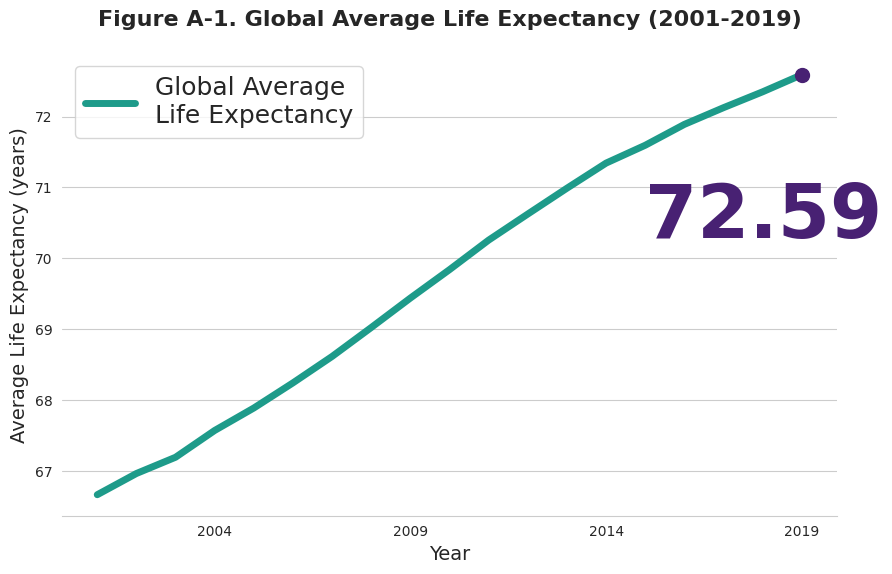

In [ ]:
# Figure A-1. Global Average Life Expectancy (2001-2019)
# The global average life expectancy increased from 66.67 years in 2001 to 72.59 years in 2019

df_global_avg = df.groupby('year')['life_expectancy'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='life_expectancy', data=df_global_avg, color=colors[5], lw=5, label='Global Average \nLife Expectancy')

plt.title('Figure A-1. Global Average Life Expectancy (2001-2019)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Life Expectancy (years)', fontsize=14)
plt.xticks(range(1999, 2024, 5))
plt.legend(loc='upper left', fontsize=18)
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

life_expectancy_2019 = df_global_avg[df_global_avg['year'] == 2019]['life_expectancy'].values[0]
plt.plot(2019, life_expectancy_2019, marker='o', markersize=10, color=colors[0], label="2019", zorder=5)

plt.text(2015, life_expectancy_2019 - 1.5, f'{life_expectancy_2019:.2f}', color=colors[0], fontsize=54, ha='left', va='top', fontweight='bold')

plt.show()



**Distribution of Life Expectancy in 2019**
Life expectancy varies from a minimum of 53.28 years (Japan) to a maximum of 84.36 years (Central African Republic)

In [ ]:
stats_2019 = df[df['year'] == 2019]['life_expectancy']
print(stats_2019.describe())

count    164.000000
mean      72.589112
std        7.706562
min       53.283000
25%       67.094250
50%       74.231341
75%       78.444793
max       84.356341
Name: life_expectancy, dtype: float64


In [ ]:
stats_2019 = df[df['year'] == 2019]
top_5_countries = stats_2019.sort_values(by='life_expectancy', ascending=False).head(5)
bottom_5_countries = stats_2019.sort_values(by='life_expectancy', ascending=True).head(5)

print("Top 5 countries with highest life expectancy:")
print(top_5_countries[['country', 'life_expectancy']])
print("\nBottom 5 countries with lowest life expectancy:")
print(bottom_5_countries[['country', 'life_expectancy']])

Top 5 countries with highest life expectancy:
          country  life_expectancy
3212        Japan        84.356341
3162  Switzerland        83.904878
3180        Spain        83.831707
3271    Singapore        83.595122
3209        Italy        83.497561

Bottom 5 countries with lowest life expectancy:
                       country  life_expectancy
3160  Central African Republic           53.283
3285                      Chad           54.239
3222                   Lesotho           54.331
3247                   Nigeria           54.687
3273              Sierra Leone           54.696


**Figure A-2. Average Life Expectancy by Region in 2019**

North America has the highest life expectancy at 80.90 years, while Sub-Saharan Africa has the lowest life expectancy at 62.72 years.

B. How does life expectancy vary by country and region?

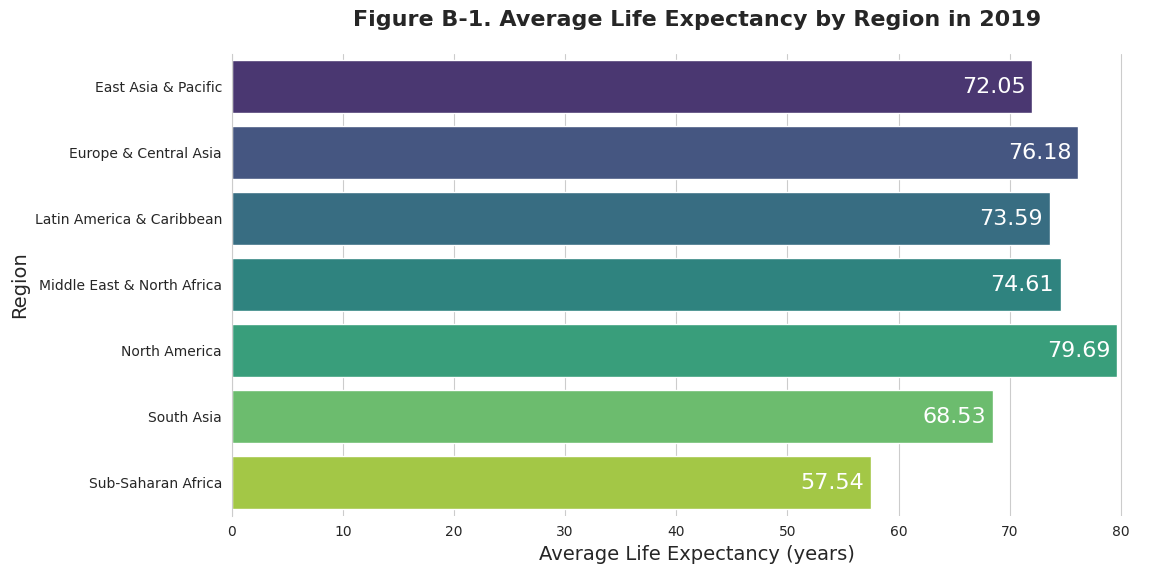

In [ ]:
# Figure B-1. Average Life Expectancy by Region in 2019
# North America has the highest life expectancy at 80.90 years, while Sub-Saharan Africa has the lowest life expectancy at 62.72 years.

df_grouped = df.groupby('region')['life_expectancy'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='life_expectancy', y='region', data=df_grouped, palette="viridis", hue='region', legend=False)

for i, row in df_grouped.iterrows():
    ax.text(row['life_expectancy'] - 3.5, i, f'{row["life_expectancy"]:.2f}',
            color='white', ha='center', va='center', fontsize=16)

plt.title('Figure B-1. Average Life Expectancy by Region in 2019', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average Life Expectancy (years)', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

## C. What factors influence life expectancy?

I conduct the order in the following order.
- I. Pair plots to observe the overview (Removed due to limitation of figures).
- II. Close Examination the relationship between each predictor variable and life expectancy.
-i) categorical variables
      a) Income group
      b) Region* (mentioned in A-2)
-ii) numerical variables
      c) Under Nourishment
      d) CO2
      e) Health Expenditure
      f) Education Expenditure
      g) Unemployment
      h) Corruption
      i) Sanitation
      j) Injuries
      k) Communicable
      l) Non-Communicable
As an overview, all variables, except for CO2, as the variables increase in the favorable direction, life expectancy tends to increase as well.
However, I will report about three variables that I have realized, emphasizing that ones should not make a generalized interpretation.
- 1) Income group
- 2) Health Expenditure
- 3) Education Expenditure
- 4) CO2

C 1) Income Group

**Figure C-1. The impact of income group on life expectancy**
In the low-income group, life expectancy is 56.56 years. As income increases, life expectancy rises, reaching 78.85 years in the high-income group.

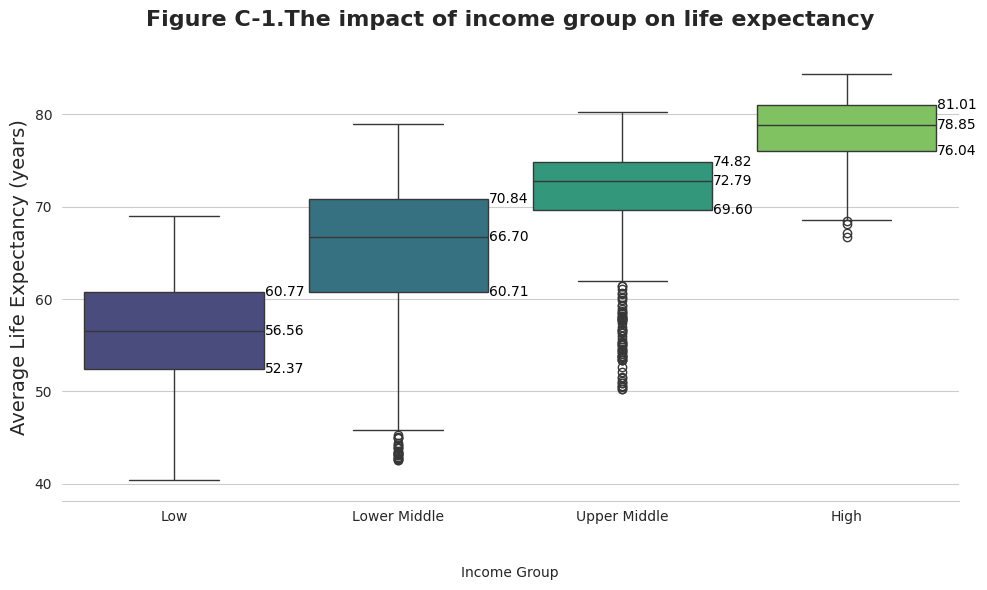

In [ ]:
# Figure C-1. The impact of income group on life expectancy
# In the low-income group, life expectancy is 56.56 years.
# As income increases, life expectancy rises, reaching 78.85 years in the high-income group.

df_cleaned = df.dropna(subset=['income', 'life_expectancy']).copy()

income_order = df_cleaned.groupby('income')['life_expectancy'].median().sort_values().index

plt.figure(figsize=(10, 6))

sns.boxplot(data=df_cleaned, x='income', y='life_expectancy', order=income_order, palette='viridis', hue='income', legend=False)

plt.xlabel('Income Group', labelpad=30)
plt.ylabel('Average Life Expectancy (years)', fontsize=14)
plt.title('Figure C-1.The impact of income group on life expectancy', fontsize=16, fontweight='bold', pad=20)

income_labels = ['Low', 'Lower Middle', 'Upper Middle', 'High']
plt.xticks(range(len(income_labels)), income_labels)

# Calculate statistics to annotate the boxplot
for i, income_group in enumerate(income_order):
    group_data = df_cleaned[df_cleaned['income'] == income_group]['life_expectancy']

    median = np.median(group_data)
    q1 = np.percentile(group_data, 25)
    q3 = np.percentile(group_data, 75)

    #plt.plot([i - 0.2, i + 0.2], [median, median], color='black', lw=2, label='Median' if i == 0 else "")
    #plt.plot([i - 0.2, i + 0.2], [q1, q1], color= 'black', lw=2, label='Q1' if i == 0 else "")
    #plt.plot([i - 0.2, i + 0.2], [q3, q3], color= 'black', lw=2, label='Q3' if i == 0 else "")
    plt.text(i + 0.405, median, f'{median:.2f}', ha='left', va='center', fontsize=10, color='black')
    plt.text(i + 0.405, q1, f'{q1:.2f}', ha='left', va='center', fontsize=10, color='black')
    plt.text(i + 0.405, q3, f'{q3:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.grid(axis='x', linestyle='None')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

C 2) Health Expenditure
    
**Figure C-2. The Impact of Health Expenditure on Life Expectancy**

As health expenditure increases, life expectancy also rises. Specifically, in the high-income group, an increase in health expenditure leads to a significant rise in life expectancy, while in the low-income group, the increase is minimal.

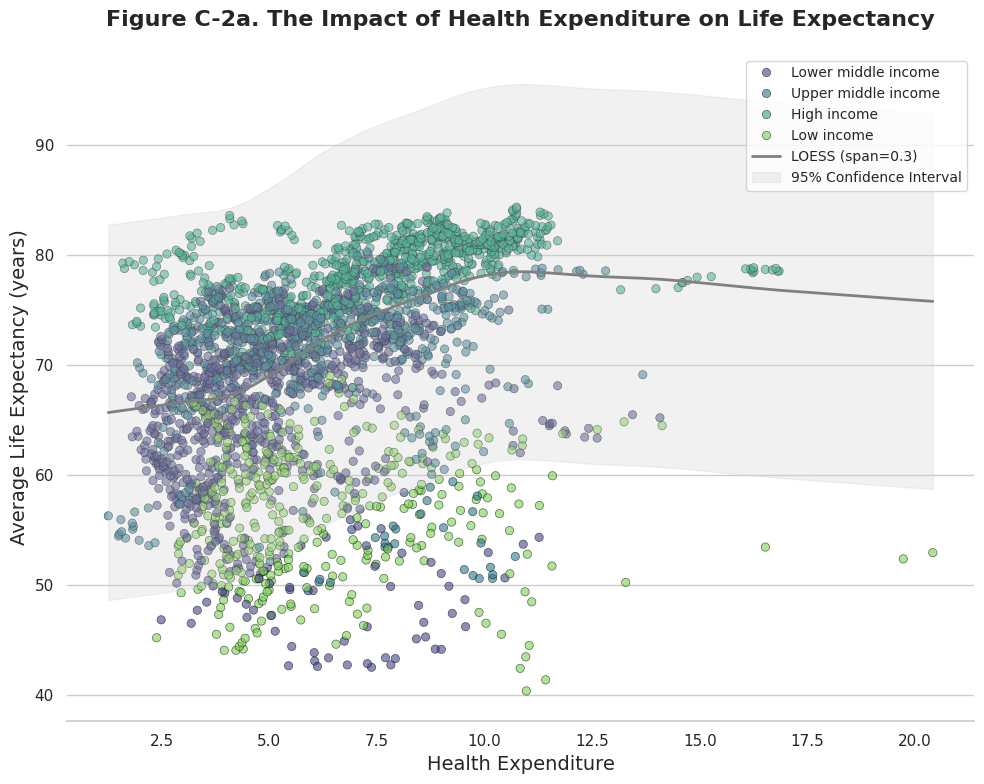

In [ ]:
# Figure C-2. The Impact of Health Expenditure on Life Expectancy
# As health expenditure increases, life expectancy also rises. Specifically, in the high-income group,
# an increase in health expenditure leads to a significant rise in life expectancy, while in the low-income group, the increase is minimal.


import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

color_map = {
    'Low income': colors[0],
    'Lower middle income': colors[2],
    'Upper middle income': colors[5],
    'High income': colors[7]
}

df_cleaned = df.dropna(subset=['health_expenditure','life_expectancy']).copy()

x = df_cleaned["health_expenditure"]
y = df_cleaned["life_expectancy"]

sorted_idx = np.argsort(x)
x_sorted = x.iloc[sorted_idx]
y_sorted = y.iloc[sorted_idx]

lowess = sm.nonparametric.lowess
smoothed = lowess(y_sorted, x_sorted, frac=0.4)

residuals = y_sorted - smoothed[:, 1]
std_error = np.std(residuals)

ci_lower = smoothed[:, 1] - 1.96 * std_error
ci_upper = smoothed[:, 1] + 1.96 * std_error

plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="viridis")

sns.scatterplot(data=df_cleaned, x='health_expenditure', y='life_expectancy', hue='income', palette='viridis', alpha=0.6, edgecolor="black")

plt.plot(smoothed[:, 0], smoothed[:, 1], color="gray", linewidth=2, label="LOESS (span=0.3)")

plt.fill_between(smoothed[:, 0], ci_lower, ci_upper, color="lightgray", alpha=0.3, label="95% Confidence Interval")

plt.xlabel('Health Expenditure', fontsize=14)
plt.ylabel('Average Life Expectancy (years)', fontsize=14)
plt.title("Figure C-2a. The Impact of Health Expenditure on Life Expectancy", fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

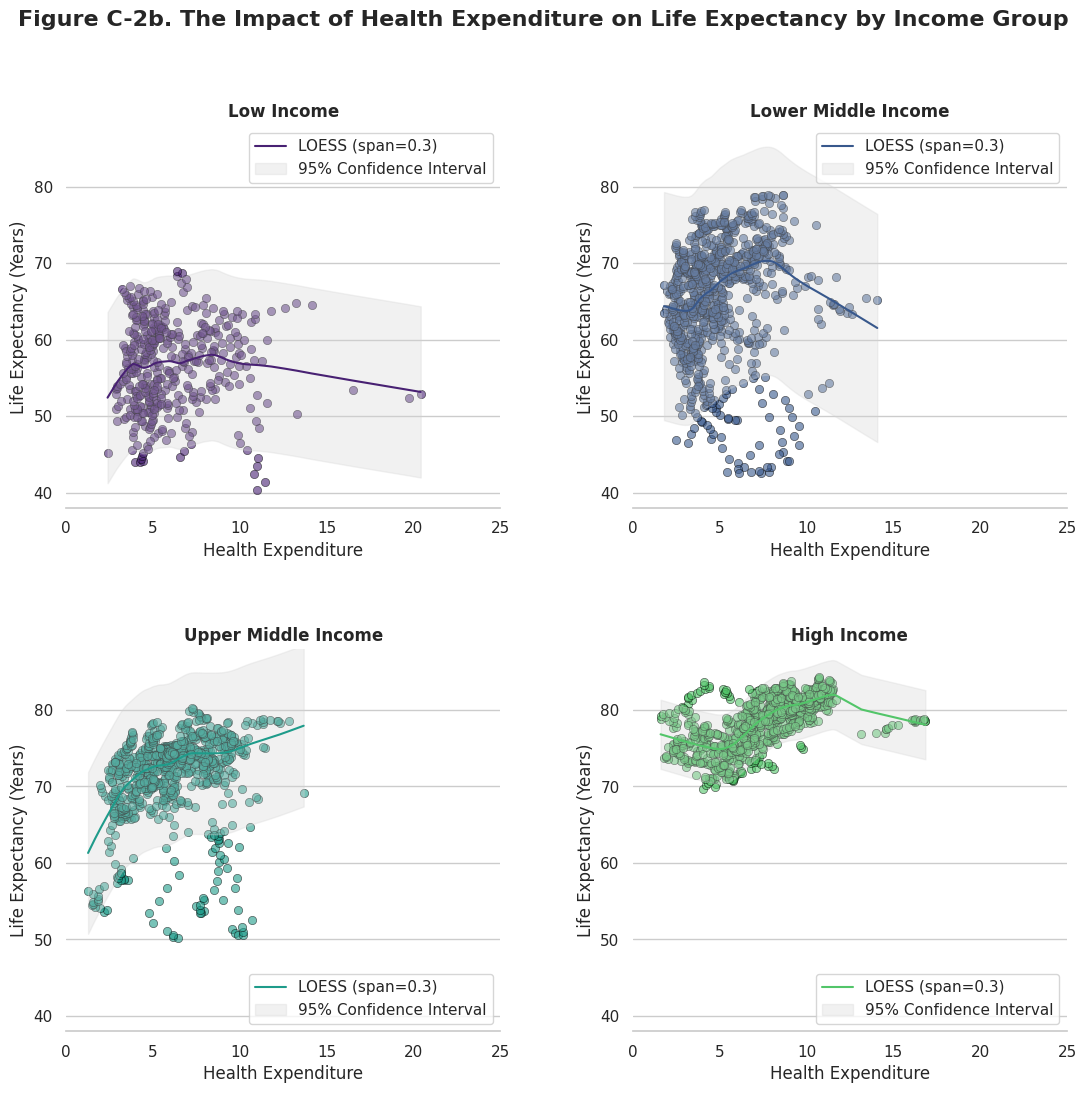

In [ ]:
df_cleaned = df.dropna(subset=['health_expenditure', 'life_expectancy', 'income']).copy()

# Low Income
low_df = df_cleaned[df_cleaned['income'] == 'Low income']
x_low = low_df['health_expenditure']
y_low = low_df['life_expectancy']
sorted_idx_low = np.argsort(x_low)
x_low_sorted = x_low.iloc[sorted_idx_low]
y_low_sorted = y_low.iloc[sorted_idx_low]
lowess = sm.nonparametric.lowess
smoothed_low = lowess(y_low_sorted, x_low_sorted, frac=0.4)

residuals_low = y_low_sorted - smoothed_low[:, 1]
std_error_low = np.std(residuals_low)
ci_lower_low = smoothed_low[:, 1] - 1.96 * std_error_low
ci_upper_low = smoothed_low[:, 1] + 1.96 * std_error_low

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(data=low_df, x='health_expenditure', y='life_expectancy', color=color_map['Low income'], alpha=0.6, edgecolor="black")
plt.plot(smoothed_low[:, 0], smoothed_low[:, 1], color=color_map['Low income'], label="LOESS (span=0.3)")
plt.fill_between(smoothed_low[:, 0], ci_lower_low, ci_upper_low, color="lightgray", alpha=0.3, label="95% Confidence Interval")
plt.xlim(0, 25)
plt.ylim(38, 88)
plt.xlabel('Health Expenditure')
plt.ylabel("Life Expectancy (Years)")
plt.title("Low Income", fontweight='bold')
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='upper right')

# Lower Middle Income
lowermiddle_df = df_cleaned[df_cleaned['income'] == 'Lower middle income']
x_lowermiddle = lowermiddle_df['health_expenditure']
y_lowermiddle = lowermiddle_df['life_expectancy']
sorted_idx_lowermiddle = np.argsort(x_lowermiddle)
x_lowermiddle_sorted = x_lowermiddle.iloc[sorted_idx_lowermiddle]
y_lowermiddle_sorted = y_lowermiddle.iloc[sorted_idx_lowermiddle]
smoothed_lowermiddle = lowess(y_lowermiddle_sorted, x_lowermiddle_sorted, frac=0.4)

residuals_lowermiddle = y_lowermiddle_sorted - smoothed_lowermiddle[:, 1]
std_error_lowermiddle = np.std(residuals_lowermiddle)
ci_lower_lowermiddle = smoothed_lowermiddle[:, 1] - 1.96 * std_error_lowermiddle
ci_upper_lowermiddle = smoothed_lowermiddle[:, 1] + 1.96 * std_error_lowermiddle

plt.subplot(2, 2, 2)
sns.scatterplot(data=lowermiddle_df, x='health_expenditure', y='life_expectancy', color=color_map['Lower middle income'], alpha=0.6, edgecolor="black")
plt.plot(smoothed_lowermiddle[:, 0], smoothed_lowermiddle[:, 1], color=color_map['Lower middle income'], label="LOESS (span=0.3)")
plt.fill_between(smoothed_lowermiddle[:, 0], ci_lower_lowermiddle, ci_upper_lowermiddle, color="lightgray", alpha=0.3, label="95% Confidence Interval")
plt.xlim(0, 25)
plt.ylim(38, 88)
plt.xlabel('Health Expenditure')
plt.ylabel("Life Expectancy (Years)")
plt.title("Lower Middle Income", fontweight='bold')
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='upper right')


# Upper Middle Income
uppermiddle_df = df_cleaned[df_cleaned['income'] == 'Upper middle income']
x_uppermiddle = uppermiddle_df['health_expenditure']
y_uppermiddle = uppermiddle_df['life_expectancy']
sorted_idx_uppermiddle = np.argsort(x_uppermiddle)
x_uppermiddle_sorted = x_uppermiddle.iloc[sorted_idx_uppermiddle]
y_uppermiddle_sorted = y_uppermiddle.iloc[sorted_idx_uppermiddle]
smoothed_uppermiddle = lowess(y_uppermiddle_sorted, x_uppermiddle_sorted, frac=0.4)

residuals_uppermiddle = y_uppermiddle_sorted - smoothed_uppermiddle[:, 1]
std_error_uppermiddle = np.std(residuals_uppermiddle)
ci_lower_uppermiddle = smoothed_uppermiddle[:, 1] - 1.96 * std_error_uppermiddle
ci_upper_uppermiddle = smoothed_uppermiddle[:, 1] + 1.96 * std_error_uppermiddle

plt.subplot(2, 2, 3)
sns.scatterplot(data=uppermiddle_df, x='health_expenditure', y='life_expectancy', color=color_map['Upper middle income'], alpha=0.6, edgecolor="black")
plt.plot(smoothed_uppermiddle[:, 0], smoothed_uppermiddle[:, 1], color=color_map['Upper middle income'], label="LOESS (span=0.3)")
plt.fill_between(smoothed_uppermiddle[:, 0], ci_lower_uppermiddle, ci_upper_uppermiddle, color="lightgray", alpha=0.3, label="95% Confidence Interval")
plt.xlim(0, 25)
plt.ylim(38, 88)
plt.xlabel('Health Expenditure')
plt.ylabel("Life Expectancy (Years)")
plt.title("Upper Middle Income", fontweight='bold')
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='lower right')

# High income
high_df = df_cleaned[df_cleaned['income'] == 'High income']
x_high = high_df['health_expenditure']
y_high = high_df['life_expectancy']
sorted_idx_high = np.argsort(x_high)
x_high_sorted = x_high.iloc[sorted_idx_high]
y_high_sorted = y_high.iloc[sorted_idx_high]
smoothed_high = lowess(y_high_sorted, x_high_sorted, frac=0.4)

residuals_high = y_high_sorted - smoothed_high[:, 1]
std_error_high = np.std(residuals_high)
ci_lower_high = smoothed_high[:, 1] - 1.96 * std_error_high
ci_upper_high = smoothed_high[:, 1] + 1.96 * std_error_high

plt.subplot(2, 2, 4)
sns.scatterplot(data=high_df, x='health_expenditure', y='life_expectancy', color=color_map['High income'], alpha=0.6, edgecolor="black")
plt.plot(smoothed_high[:, 0], smoothed_high[:, 1], color=color_map['High income'], label="LOESS (span=0.3)")
plt.fill_between(smoothed_high[:, 0], ci_lower_high, ci_upper_high, color="lightgray", alpha=0.3, label="95% Confidence Interval")
plt.xlim(0, 25)
plt.ylim(38, 88)
plt.xlabel('Health Expenditure')
plt.ylabel("Life Expectancy (Years)")
plt.title("High Income", fontweight='bold')
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='lower right')

plt.suptitle('Figure C-2b. The Impact of Health Expenditure on Life Expectancy by Income Group',fontsize=16, fontweight='bold', y=0.95)

plt.tight_layout(pad=4)
plt.show()


C 3) Education Expenditure

**Figure C-3. The impact of Education Expenditure on Life Expectancy**

As education expenditure increases, life expectancy also rises. Specifically, in the low-income group, an increase in education expenditure leads to a significant rise in life expectancy,
while in the high-income group, the increase is minimal.


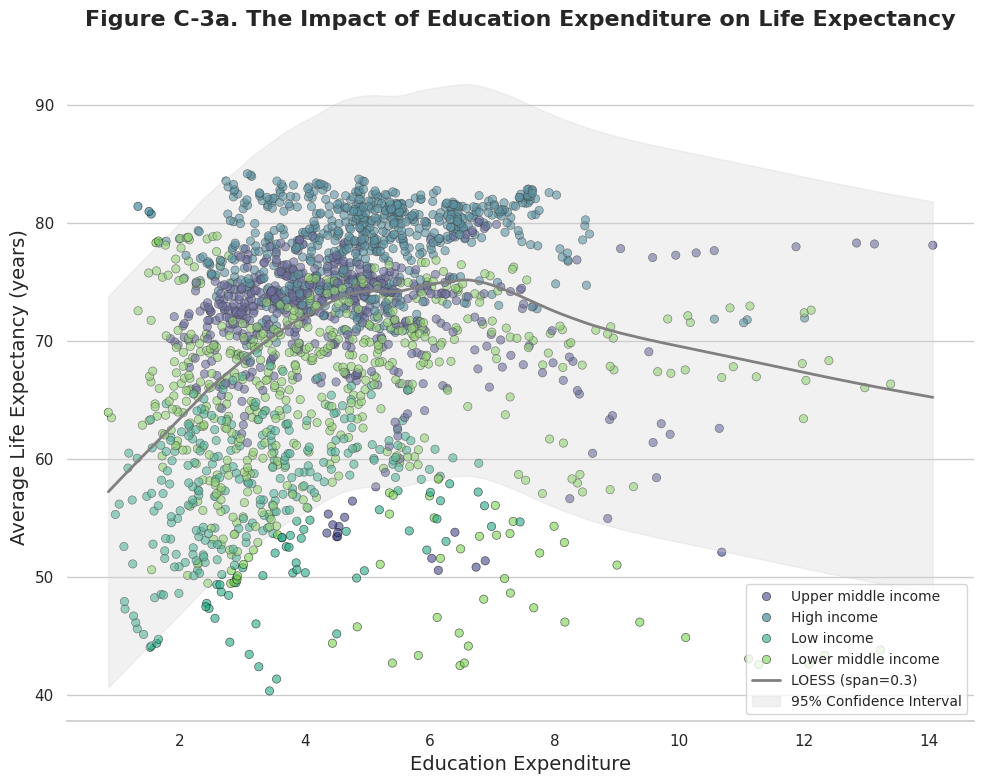

In [ ]:
# Figure C-3. The impact of Education Expenditure on Life Expectancy
# As education expenditure increases, life expectancy also rises.
# Specifically, in the low-income group, an increase in education expenditure leads to a significant rise in life expectancy,
# while in the high-income group, the increase is minimal.

df_cleaned = df.dropna(subset=['education_expenditure', 'life_expectancy']).copy()

x = df_cleaned["education_expenditure"]
y = df_cleaned["life_expectancy"]

sorted_idx = np.argsort(x)
x_sorted = x.iloc[sorted_idx]
y_sorted = y.iloc[sorted_idx]

lowess = sm.nonparametric.lowess
smoothed = lowess(y_sorted, x_sorted, frac=0.4)

residuals = y_sorted - smoothed[:, 1]
std_error = np.std(residuals)

ci_lower = smoothed[:, 1] - 1.96 * std_error
ci_upper = smoothed[:, 1] + 1.96 * std_error

plt.figure(figsize=(10, 8))

sns.scatterplot(data=df_cleaned, x='education_expenditure', y='life_expectancy', hue='income', palette='viridis', alpha=0.6, edgecolor="black")

plt.plot(smoothed[:, 0], smoothed[:, 1], color="gray", linewidth=2, label="LOESS (span=0.3)")

plt.fill_between(smoothed[:, 0], ci_lower, ci_upper, color="lightgray", alpha=0.3, label="95% Confidence Interval")

plt.xlabel('Education Expenditure', fontsize=14)
plt.ylabel('Average Life Expectancy (years)', fontsize=14)
plt.title("Figure C-3a. The Impact of Education Expenditure on Life Expectancy", fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='lower right', fontsize=10)
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


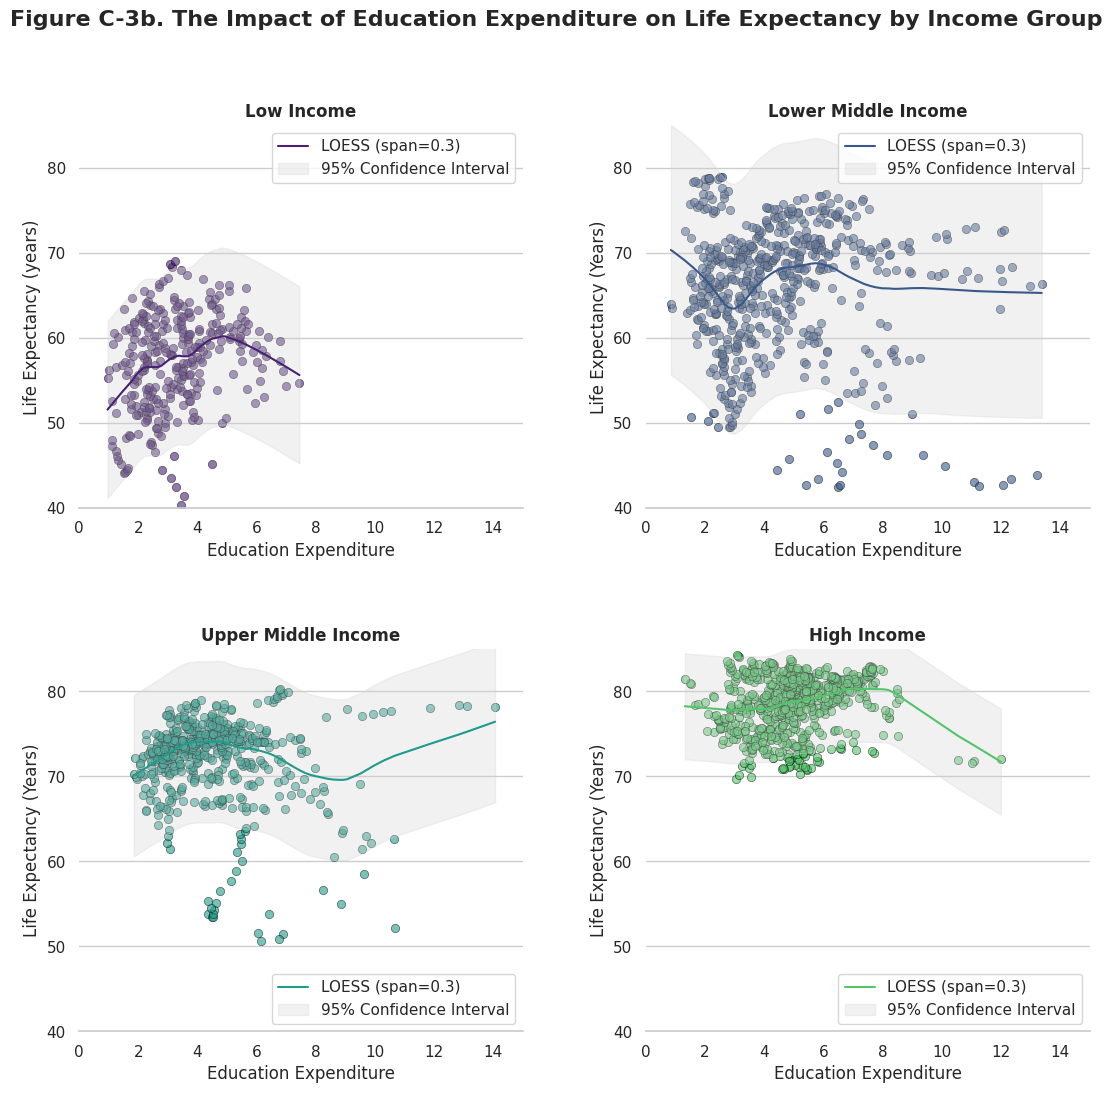

In [ ]:
df_cleaned = df.dropna(subset=['education_expenditure', 'life_expectancy', 'income']).copy()

plt.figure(figsize=(12, 12))

# Low Income
low_df = df_cleaned[df_cleaned['income'] == 'Low income']
x_low = low_df['education_expenditure']
y_low = low_df['life_expectancy']
sorted_idx_low = np.argsort(x_low)
x_low_sorted = x_low.iloc[sorted_idx_low]
y_low_sorted = y_low.iloc[sorted_idx_low]
lowess = sm.nonparametric.lowess
smoothed_low = lowess(y_low_sorted, x_low_sorted, frac=0.4)

residuals_low = y_low_sorted - smoothed_low[:, 1]
std_error_low = np.std(residuals_low)
ci_lower_low = smoothed_low[:, 1] - 1.96 * std_error_low
ci_upper_low = smoothed_low[:, 1] + 1.96 * std_error_low

plt.subplot(2, 2, 1)
sns.scatterplot(data=low_df, x='education_expenditure', y='life_expectancy', color=color_map['Low income'], alpha=0.6, edgecolor="black")
plt.plot(smoothed_low[:, 0], smoothed_low[:, 1], color=color_map['Low income'], label="LOESS (span=0.3)")
plt.fill_between(smoothed_low[:, 0], ci_lower_low, ci_upper_low, color="lightgray", alpha=0.3, label="95% Confidence Interval")
plt.xlim(0, 15)
plt.ylim(40, 85)
plt.xlabel('Education Expenditure')
plt.ylabel("Life Expectancy (years)")
plt.title("Low Income", fontweight='bold')
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='upper right')
plt.yticks(np.arange(40, 90, 10))

# Process for Lower Middle Income
lowermiddle_df = df_cleaned[df_cleaned['income'] == 'Lower middle income']
x_lowermiddle = lowermiddle_df['education_expenditure']
y_lowermiddle = lowermiddle_df['life_expectancy']
sorted_idx_lowermiddle = np.argsort(x_lowermiddle)
x_lowermiddle_sorted = x_lowermiddle.iloc[sorted_idx_lowermiddle]
y_lowermiddle_sorted = y_lowermiddle.iloc[sorted_idx_lowermiddle]
smoothed_lowermiddle = lowess(y_lowermiddle_sorted, x_lowermiddle_sorted, frac=0.4)

residuals_lowermiddle = y_lowermiddle_sorted - smoothed_lowermiddle[:, 1]
std_error_lowermiddle = np.std(residuals_lowermiddle)
ci_lower_lowermiddle = smoothed_lowermiddle[:, 1] - 1.96 * std_error_lowermiddle
ci_upper_lowermiddle = smoothed_lowermiddle[:, 1] + 1.96 * std_error_lowermiddle

plt.subplot(2, 2, 2)
sns.scatterplot(data=lowermiddle_df, x='education_expenditure', y='life_expectancy', color=color_map['Lower middle income'], alpha=0.6, edgecolor="black")
plt.plot(smoothed_lowermiddle[:, 0], smoothed_lowermiddle[:, 1], color=color_map['Lower middle income'], label="LOESS (span=0.3)")
plt.fill_between(smoothed_lowermiddle[:, 0], ci_lower_lowermiddle, ci_upper_lowermiddle, color="lightgray", alpha=0.3, label="95% Confidence Interval")
plt.xlim(0, 15)
plt.ylim(40, 85)
plt.xlabel('Education Expenditure')
plt.ylabel("Life Expectancy (Years)")
plt.title("Lower Middle Income", fontweight='bold')
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='upper right')
plt.yticks(np.arange(40, 90, 10))

# Process for Upper Middle Income
uppermiddle_df = df_cleaned[df_cleaned['income'] == 'Upper middle income']
x_uppermiddle = uppermiddle_df['education_expenditure']
y_uppermiddle = uppermiddle_df['life_expectancy']
sorted_idx_uppermiddle = np.argsort(x_uppermiddle)
x_uppermiddle_sorted = x_uppermiddle.iloc[sorted_idx_uppermiddle]
y_uppermiddle_sorted = y_uppermiddle.iloc[sorted_idx_uppermiddle]
smoothed_uppermiddle = lowess(y_uppermiddle_sorted, x_uppermiddle_sorted, frac=0.4)

residuals_uppermiddle = y_uppermiddle_sorted - smoothed_uppermiddle[:, 1]
std_error_uppermiddle = np.std(residuals_uppermiddle)
ci_lower_uppermiddle = smoothed_uppermiddle[:, 1] - 1.96 * std_error_uppermiddle
ci_upper_uppermiddle = smoothed_uppermiddle[:, 1] + 1.96 * std_error_uppermiddle

plt.subplot(2, 2, 3)
sns.scatterplot(data=uppermiddle_df, x='education_expenditure', y='life_expectancy', color=color_map['Upper middle income'], alpha=0.6, edgecolor="black")
plt.plot(smoothed_uppermiddle[:, 0], smoothed_uppermiddle[:, 1], color=color_map['Upper middle income'], label="LOESS (span=0.3)")
plt.fill_between(smoothed_uppermiddle[:, 0], ci_lower_uppermiddle, ci_upper_uppermiddle, color="lightgray", alpha=0.3, label="95% Confidence Interval")
plt.xlim(0, 15)
plt.ylim(40, 85)
plt.xlabel('Education Expenditure')
plt.ylabel("Life Expectancy (Years)")
plt.title("Upper Middle Income", fontweight='bold')
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='lower right')
plt.yticks(np.arange(40, 90, 10))

# Process for High Income
high_df = df_cleaned[df_cleaned['income'] == 'High income']
x_high = high_df['education_expenditure']
y_high = high_df['life_expectancy']
sorted_idx_high = np.argsort(x_high)
x_high_sorted = x_high.iloc[sorted_idx_high]
y_high_sorted = y_high.iloc[sorted_idx_high]
smoothed_high = lowess(y_high_sorted, x_high_sorted, frac=0.4)

residuals_high = y_high_sorted - smoothed_high[:, 1]
std_error_high = np.std(residuals_high)
ci_lower_high = smoothed_high[:, 1] - 1.96 * std_error_high
ci_upper_high = smoothed_high[:, 1] + 1.96 * std_error_high

plt.subplot(2, 2, 4)
sns.scatterplot(data=high_df, x='education_expenditure', y='life_expectancy', color=color_map['High income'], alpha=0.6, edgecolor="black")
plt.plot(smoothed_high[:, 0], smoothed_high[:, 1], color=color_map['High income'], label="LOESS (span=0.3)")
plt.fill_between(smoothed_high[:, 0], ci_lower_high, ci_upper_high, color="lightgray", alpha=0.3, label="95% Confidence Interval")
plt.xlim(0, 15)
plt.ylim(40, 85)
plt.xlabel('Education Expenditure')
plt.ylabel("Life Expectancy (Years)")
plt.title("High Income", fontweight='bold')
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='lower right')
plt.yticks(np.arange(40, 90, 10))

plt.suptitle('Figure C-3b. The Impact of Education Expenditure on Life Expectancy by Income Group',fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout(pad=4)
plt.show()


C 4) CO2 Emission

**Figure C-4-'Graph of Nonsence': The Impact of CO2 on Life Expectancy (all)**

I examine the impact of CO2 emissions on life expectancy. When visualizing the effect of CO2 on life expectancy using a scatter plot, the data is left-skewed, which complicates interpretation. There are a few extreme outliers on the right side that distort the overall shape of the graph.

**Figure C-4a: The impact of CO2 on Life Expectancy (Outliers Removed)**

After removing the outliers, the graph reveals a saturation curve.

**Figure C-4b: The impact of CO2 on Life Expectancy by Income Group**

Observations by income group show the following:
- i) There is a positive relationship between CO2 and life expectancy when CO2 is below a certain point, around 35,000 (I attempted to calculate the exact threshold but could not).
- ii) However, once CO2 reaches that level, it has a negative effect on life expectancy.


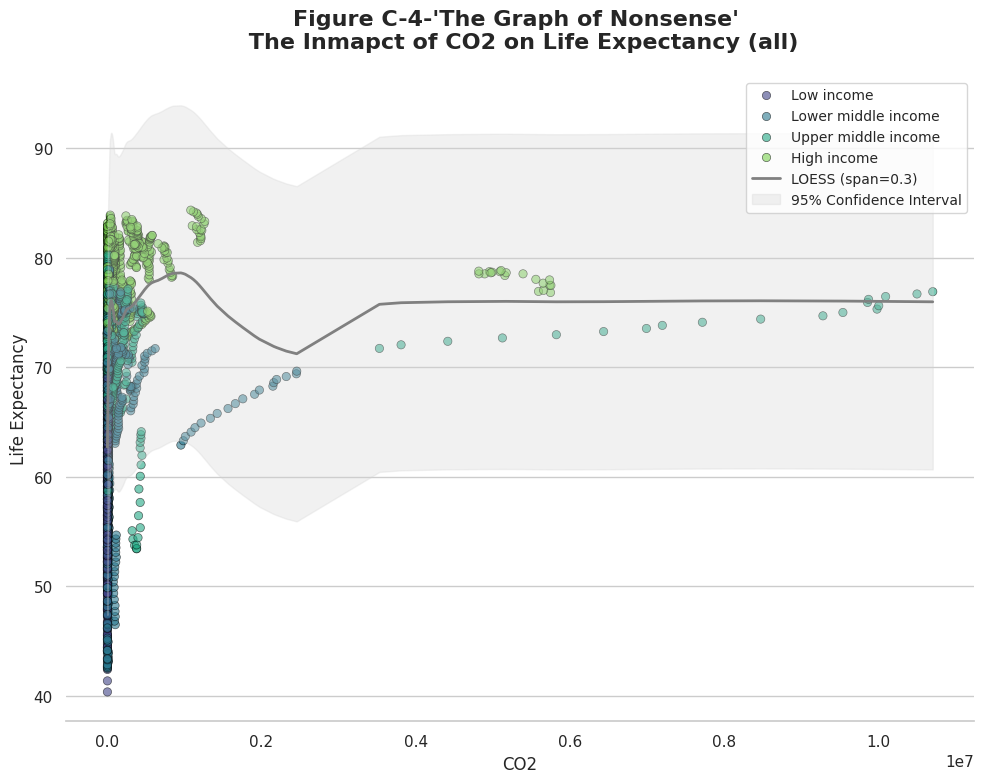

In [ ]:
# Figure C-4-'Graph of Nonsence': The Impact of CO2 on Life Expectancy (all)
# I examine the impact of CO2 emissions on life expectancy.
# When visualizing the effect of CO2 on life expectancy using a scatter plot, the data is left-skewed, which complicates interpretation.
# There are a few extreme outliers on the right side that distort the overall shape of the graph.

df_cleaned = df.dropna(subset=['co2', 'life_expectancy']).copy()

x = df_cleaned["co2"]
y = df_cleaned["life_expectancy"]

sorted_idx = np.argsort(x)
x_sorted = x.iloc[sorted_idx]
y_sorted = y.iloc[sorted_idx]

lowess = sm.nonparametric.lowess
smoothed = lowess(y_sorted, x_sorted, frac=0.4)

residuals = y_sorted - smoothed[:, 1]
std_error = np.std(residuals)

ci_lower = smoothed[:, 1] - 1.96 * std_error
ci_upper = smoothed[:, 1] + 1.96 * std_error

plt.figure(figsize=(10, 8))

sns.scatterplot(data=df_cleaned, x='co2', y='life_expectancy', hue='income', palette='viridis', alpha=0.6, edgecolor="black")

plt.plot(smoothed[:, 0], smoothed[:, 1], color="gray", linewidth=2, label="LOESS (span=0.3)")

plt.fill_between(smoothed[:, 0], ci_lower, ci_upper, color="lightgray", alpha=0.3, label="95% Confidence Interval")

plt.xlabel('CO2', fontsize=12)
plt.ylabel("Life Expectancy", fontsize=12)
plt.title("Figure C-4-'The Graph of Nonsense' \n The Inmapct of CO2 on Life Expectancy (all)", fontsize=16, fontweight='bold', pad=20)

plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()



In [ ]:
# culculate outliers
x = df_cleaned["co2"]

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = x[(x < lower_bound) | (x > upper_bound)]

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Outliers:\n{outliers}")


Lower Bound: -86643.74905500001
Upper Bound: 150946.248521
Outliers:
9       3.456400e+05
24      3.193800e+05
29      5.066200e+05
32      3.529080e+06
40      8.476800e+05
            ...     
3287    2.670900e+05
3296    1.747300e+05
3298    4.817720e+06
3300    3.364900e+05
3303    4.396400e+05
Name: co2, Length: 460, dtype: float64


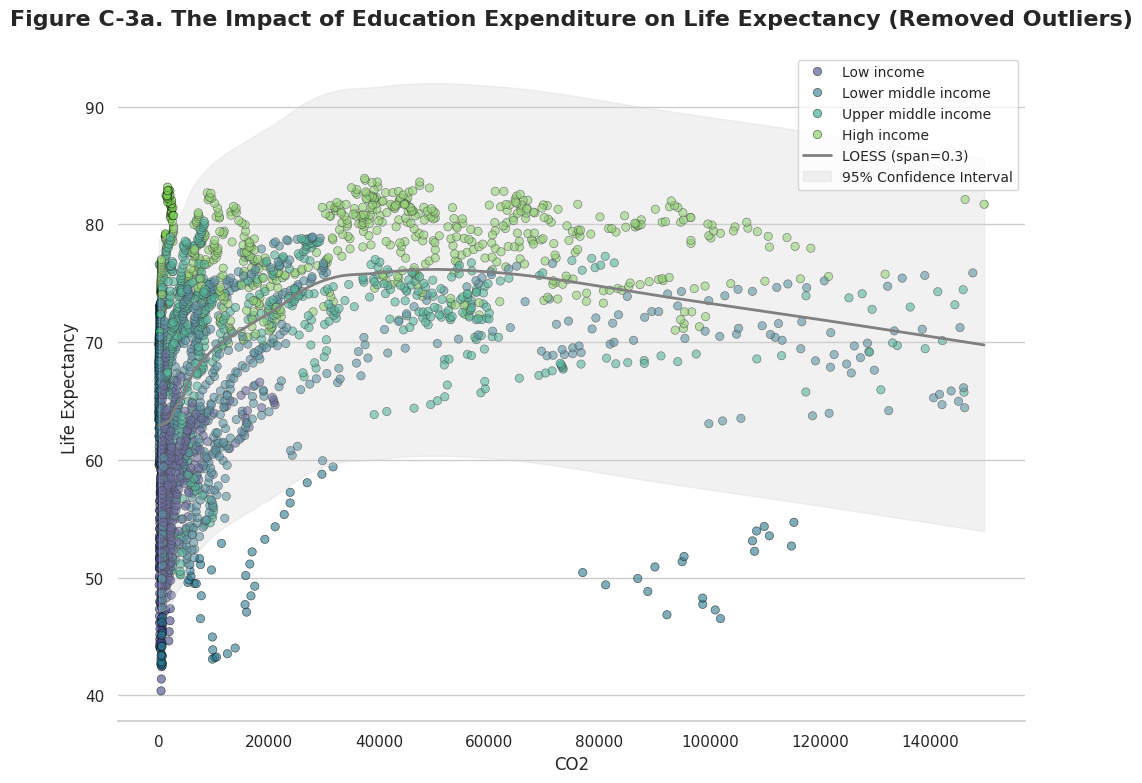

In [ ]:
#Figure C-4a: The impact of CO2 on Life Expectancy (Outliers Removed)
#After removing the outliers, the graph reveals a saturation curve.

x = df_cleaned["co2"]

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_cleaned[(x >= lower_bound) & (x <= upper_bound)].copy()

# repeat
x = df_no_outliers["co2"]
y = df_no_outliers["life_expectancy"]

sorted_idx = np.argsort(x)
x_sorted = x.iloc[sorted_idx]
y_sorted = y.iloc[sorted_idx]

lowess = sm.nonparametric.lowess
smoothed = lowess(y_sorted, x_sorted, frac=0.4)

residuals = y_sorted - smoothed[:, 1]
std_error = np.std(residuals)

ci_lower = smoothed[:, 1] - 1.96 * std_error
ci_upper = smoothed[:, 1] + 1.96 * std_error

plt.figure(figsize=(10, 8))

sns.scatterplot(data=df_no_outliers, x='co2', y='life_expectancy', hue='income', palette='viridis', alpha=0.6, edgecolor="black")

plt.plot(smoothed[:, 0], smoothed[:, 1], color="gray", linewidth=2, label="LOESS (span=0.3)")

plt.fill_between(smoothed[:, 0], ci_lower, ci_upper, color="lightgray", alpha=0.3, label="95% Confidence Interval")

plt.xlabel('CO2', fontsize=12)
plt.ylabel("Life Expectancy", fontsize=12)
plt.title("Figure C-3a. The Impact of Education Expenditure on Life Expectancy (Removed Outliers)", fontsize=16, fontweight='bold', pad=20)

plt.legend(loc='upper right', fontsize=10)

plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


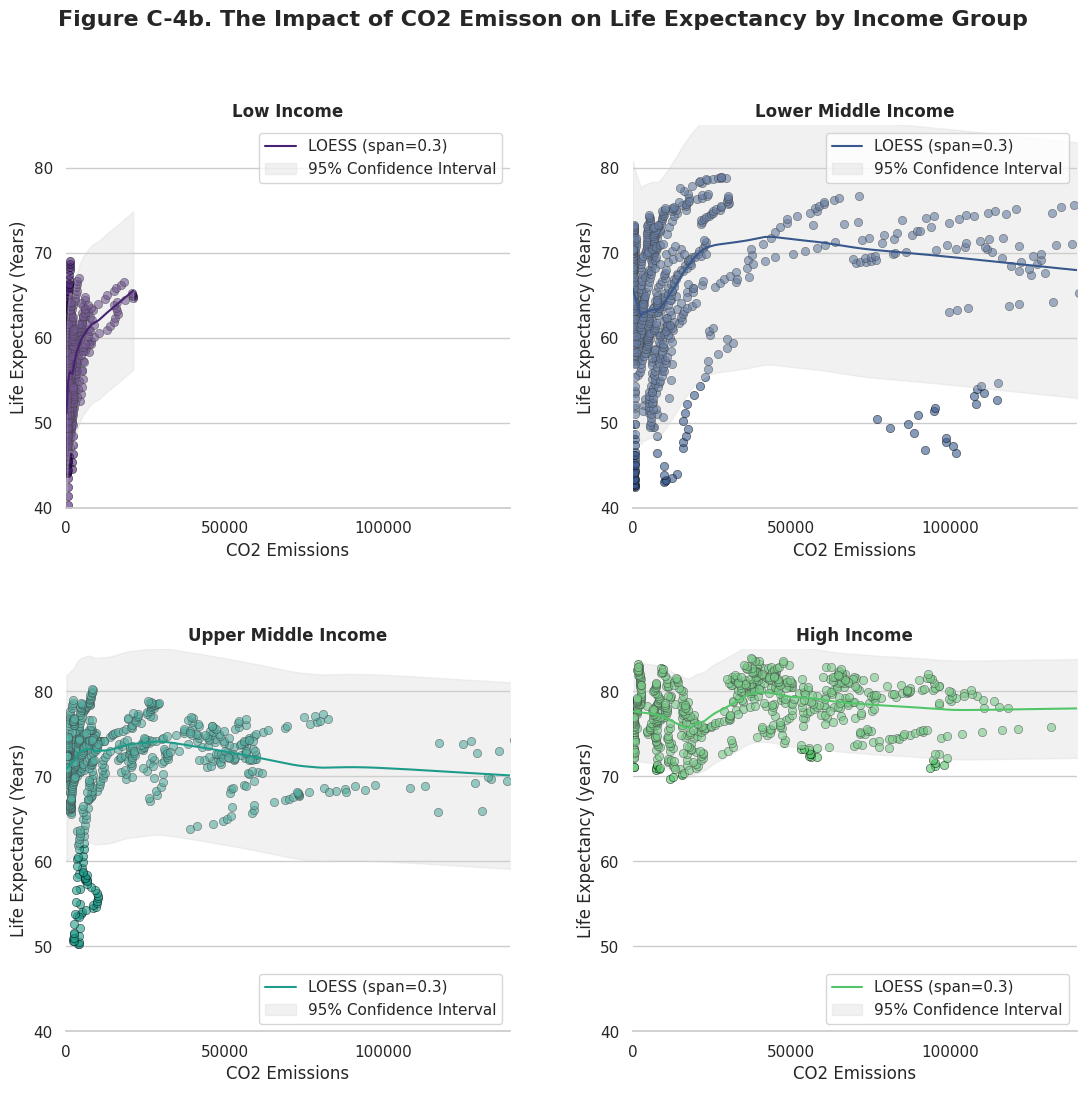

In [ ]:
# Figure C-4b: The impact of CO2 on Life Expectancy by Income Group
# Observations by income group show the following:
# i) There is a positive relationship between CO2 and life expectancy when CO2 is below a certain point, around 35,000 (I attempted to calculate the exact threshold but could not).
# ii) However, once CO2 reaches that level, it has a negative effect on life expectancy.

plt.figure(figsize=(12, 12))

# Process for Low Income
low_df = df_no_outliers[df_no_outliers['income'] == 'Low income']
x_low = low_df['co2']
y_low = low_df['life_expectancy']
sorted_idx_low = np.argsort(x_low)
x_low_sorted = x_low.iloc[sorted_idx_low]
y_low_sorted = y_low.iloc[sorted_idx_low]
lowess = sm.nonparametric.lowess
smoothed_low = lowess(y_low_sorted, x_low_sorted, frac=0.4)

residuals_low = y_low_sorted - smoothed_low[:, 1]
std_error_low = np.std(residuals_low)
ci_lower_low = smoothed_low[:, 1] - 1.96 * std_error_low
ci_upper_low = smoothed_low[:, 1] + 1.96 * std_error_low

plt.subplot(2, 2, 1)
sns.scatterplot(data=low_df, x='co2', y='life_expectancy', color=color_map['Low income'], alpha=0.6, edgecolor="black")
plt.plot(smoothed_low[:, 0], smoothed_low[:, 1], color=color_map['Low income'], label="LOESS (span=0.3)")
plt.fill_between(smoothed_low[:, 0], ci_lower_low, ci_upper_low, color="lightgray", alpha=0.3, label="95% Confidence Interval")
plt.xlim(0, 140000)
plt.ylim(40, 85)
plt.xlabel('CO2 Emissions')
plt.ylabel("Life Expectancy (Years)")
plt.title("Low Income", fontweight='bold')
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='upper right')
plt.xticks(np.arange(0, 140001, 50000))
plt.yticks(np.arange(40, 90, 10))

# Process for Lower Middle Income
lowermiddle_df = df_no_outliers[df_no_outliers['income'] == 'Lower middle income']
x_lowermiddle = lowermiddle_df['co2']
y_lowermiddle = lowermiddle_df['life_expectancy']
sorted_idx_lowermiddle = np.argsort(x_lowermiddle)
x_lowermiddle_sorted = x_lowermiddle.iloc[sorted_idx_lowermiddle]
y_lowermiddle_sorted = y_lowermiddle.iloc[sorted_idx_lowermiddle]
smoothed_lowermiddle = lowess(y_lowermiddle_sorted, x_lowermiddle_sorted, frac=0.4)

residuals_lowermiddle = y_lowermiddle_sorted - smoothed_lowermiddle[:, 1]
std_error_lowermiddle = np.std(residuals_lowermiddle)
ci_lower_lowermiddle = smoothed_lowermiddle[:, 1] - 1.96 * std_error_lowermiddle
ci_upper_lowermiddle = smoothed_lowermiddle[:, 1] + 1.96 * std_error_lowermiddle

plt.subplot(2, 2, 2)
sns.scatterplot(data=lowermiddle_df, x='co2', y='life_expectancy', color=color_map['Lower middle income'], alpha=0.6, edgecolor="black")
plt.plot(smoothed_lowermiddle[:, 0], smoothed_lowermiddle[:, 1], color=color_map['Lower middle income'], label="LOESS (span=0.3)")
plt.fill_between(smoothed_lowermiddle[:, 0], ci_lower_lowermiddle, ci_upper_lowermiddle, color="lightgray", alpha=0.3, label="95% Confidence Interval")
plt.xlim(0, 140000)
plt.ylim(40, 85)
plt.xlabel('CO2 Emissions')
plt.ylabel("Life Expectancy (Years)")
plt.title("Lower Middle Income", fontweight='bold')
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='upper right')
plt.xticks(np.arange(0, 140001, 50000))
plt.yticks(np.arange(40, 90, 10))

# Process for Upper Middle Income
uppermiddle_df = df_no_outliers[df_no_outliers['income'] == 'Upper middle income']
x_uppermiddle = uppermiddle_df['co2']
y_uppermiddle = uppermiddle_df['life_expectancy']
sorted_idx_uppermiddle = np.argsort(x_uppermiddle)
x_uppermiddle_sorted = x_uppermiddle.iloc[sorted_idx_uppermiddle]
y_uppermiddle_sorted = y_uppermiddle.iloc[sorted_idx_uppermiddle]
smoothed_uppermiddle = lowess(y_uppermiddle_sorted, x_uppermiddle_sorted, frac=0.4)

residuals_uppermiddle = y_uppermiddle_sorted - smoothed_uppermiddle[:, 1]
std_error_uppermiddle = np.std(residuals_uppermiddle)
ci_lower_uppermiddle = smoothed_uppermiddle[:, 1] - 1.96 * std_error_uppermiddle
ci_upper_uppermiddle = smoothed_uppermiddle[:, 1] + 1.96 * std_error_uppermiddle

plt.subplot(2, 2, 3)
sns.scatterplot(data=uppermiddle_df, x='co2', y='life_expectancy', color=color_map['Upper middle income'], alpha=0.6, edgecolor="black")
plt.plot(smoothed_uppermiddle[:, 0], smoothed_uppermiddle[:, 1], color=color_map['Upper middle income'], label="LOESS (span=0.3)")
plt.fill_between(smoothed_uppermiddle[:, 0], ci_lower_uppermiddle, ci_upper_uppermiddle, color="lightgray", alpha=0.3, label="95% Confidence Interval")
plt.xlim(0, 140000)
plt.ylim(40, 85)
plt.xlabel('CO2 Emissions')
plt.ylabel("Life Expectancy (Years)")
plt.title("Upper Middle Income", fontweight='bold')
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='lower right')
plt.xticks(np.arange(0, 140001, 50000))
plt.yticks(np.arange(40, 90, 10))

# Process for High Income
high_df = df_no_outliers[df_no_outliers['income'] == 'High income']
x_high = high_df['co2']
y_high = high_df['life_expectancy']
sorted_idx_high = np.argsort(x_high)
x_high_sorted = x_high.iloc[sorted_idx_high]
y_high_sorted = y_high.iloc[sorted_idx_high]
smoothed_high = lowess(y_high_sorted, x_high_sorted, frac=0.4)

residuals_high = y_high_sorted - smoothed_high[:, 1]
std_error_high = np.std(residuals_high)
ci_lower_high = smoothed_high[:, 1] - 1.96 * std_error_high
ci_upper_high = smoothed_high[:, 1] + 1.96 * std_error_high

plt.subplot(2, 2, 4)
sns.scatterplot(data=high_df, x='co2', y='life_expectancy', color=color_map['High income'], alpha=0.6, edgecolor="black")
plt.plot(smoothed_high[:, 0], smoothed_high[:, 1], color=color_map['High income'], label="LOESS (span=0.3)")
plt.fill_between(smoothed_high[:, 0], ci_lower_high, ci_upper_high, color="lightgray", alpha=0.3, label="95% Confidence Interval")
plt.xlim(0, 140000)
plt.ylim(40, 85)
plt.xlabel('CO2 Emissions')
plt.ylabel("Life Expectancy (years)")
plt.title("High Income", fontweight='bold')
plt.grid(axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='lower right')
plt.xticks(np.arange(0, 140001, 50000))
plt.yticks(np.arange(40, 90, 10))

plt.suptitle('Figure C-4b. The Impact of CO2 Emisson on Life Expectancy by Income Group', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout(pad=4)
plt.show()


# D. Can we predict the life expectancy from this data?

## Model A (Model 8)
There's some overfitting, but it doesn't seem too bad.

**Coefficients:**

| Variable                  | Coefficient   |
|---------------------------|---------------|
| under_nourishment          | -1.696839     |
| health_expenditure         | 0.159046      |
| education_expenditure      | 1.003542      |
| unemployment               | -1.173628     |
| communicable               | -2.215451     |
| income_group_encoded       | 3.535869      |
| corruption                 | 0.332110      |

**Evaluation Metrics:**

- **R²**: 0.667861071813951
- **Training Mean Squared Error**: 19.909012910873347
- **Testing Mean Squared Error**: 17.988710859070256


## Model B

The results suggest the following relationship between CO2 emissions and life expectancy:

For CO2 emissions less than or equal to 35,000, life expectancy increases (Coefficient = 1.54).
For CO2 emissions greater than 35,000, life expectancy decreases (Coefficient = -0.69).
I think this is a reasonable interpretation of the findings.

### i) CO2 all (Model 9)

**Coefficients:**

| Variable                  | Coefficient   |
|---------------------------|---------------|
| under_nourishment          | -3.921233     |
| health_expenditure         | 2.725108      |
| education_expenditure      | 0.726576      |
| unemployment               | -0.066631     |
| co2                        | 0.858437      |

**Evaluation Metrics:**

- **R²**: 0.6627855565959417
- **Training Mean Squared Error**: 25.34003947768934
- **Testing Mean Squared Error**: 17.07586571231005


### ii) CO2 ≤ 35000 (Model 10)

**Coefficients:**

| Variable                  | Coefficient   |
|---------------------------|---------------|
| under_nourishment          | -4.066056     |
| health_expenditure         | 3.020218      |
| education_expenditure      | 1.073102      |
| unemployment               | 0.139971      |
| co2                        | 1.540555      |

**Evaluation Metrics:**

- **R²**: 0.4695712363070941
- **Training Mean Squared Error**: 27.008379818845512
- **Testing Mean Squared Error**: 31.316108296626126


### iii) CO2 > 35000 (Model 11)

**Coefficients:**

| Variable                  | Coefficient   |
|---------------------------|---------------|
| under_nourishment          | -0.740514     |
| health_expenditure         | 2.722035      |
| education_expenditure      | 0.475720      |
| unemployment               | -0.660099     |
| co2                        | -0.687016     |

**Evaluation Metrics:**

- **R²**: 0.7311660902125763
- **Training Mean Squared Error**: 5.9344628059052695
- **Testing Mean Squared Error**: 5.673178078010252


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import joblib

In [ ]:
# **Model 3: Exclude co2**

df_cleaned = df.dropna(subset=['under_nourishment', 'health_expenditure', 'education_expenditure',
                'unemployment', 'communicable', 'income', 'corruption']).copy()

# Encode categorical variable: 'income'
income_group_mapping = {'Low income': 1, 'Lower middle income': 2, 'Upper middle income': 3, 'High income': 4}
df_cleaned['income_group_encoded'] = df_cleaned['income'].map(income_group_mapping)

# Define features and target variable
X_3 = df_cleaned[['under_nourishment', 'health_expenditure', 'education_expenditure',
                'unemployment', 'communicable', 'income_group_encoded', 'corruption']]
y_3 = df_cleaned['life_expectancy']

# Split into training and test datasets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

# Standardize features
scaler_3 = StandardScaler()
X_train_scaled_3 = scaler_3.fit_transform(X_train_3)
X_test_scaled_3 = scaler_3.transform(X_test_3)

# Initialize and train the linear regression model
linear_model_3 = LinearRegression()
linear_model_3.fit(X_train_scaled_3, y_train_3)

# Get and print coefficients
coefficients_3 = pd.DataFrame(linear_model_3.coef_, X_3.columns, columns=["Coefficient"])
print(coefficients_3)

# Make predictions
y_pred_3 = linear_model_3.predict(X_test_scaled_3)

# Model evaluation
mse_3 = mean_squared_error(y_test_3, y_pred_3)
print(f"Mean Squared Error (Linear Regression) - Model 3: {mse_3}")

# Save the model and the standardization scaler
joblib.dump(linear_model_3, 'linear_model_3.pkl')
joblib.dump(scaler_3, 'scaler_3.pkl')

                       Coefficient
under_nourishment        -1.786359
health_expenditure        1.027769
education_expenditure     0.309299
unemployment             -2.199720
communicable             -0.054483
income_group_encoded      3.695066
corruption                0.165733
Mean Squared Error (Linear Regression) - Model 3: 37.05059253291656


['scaler_3.pkl']

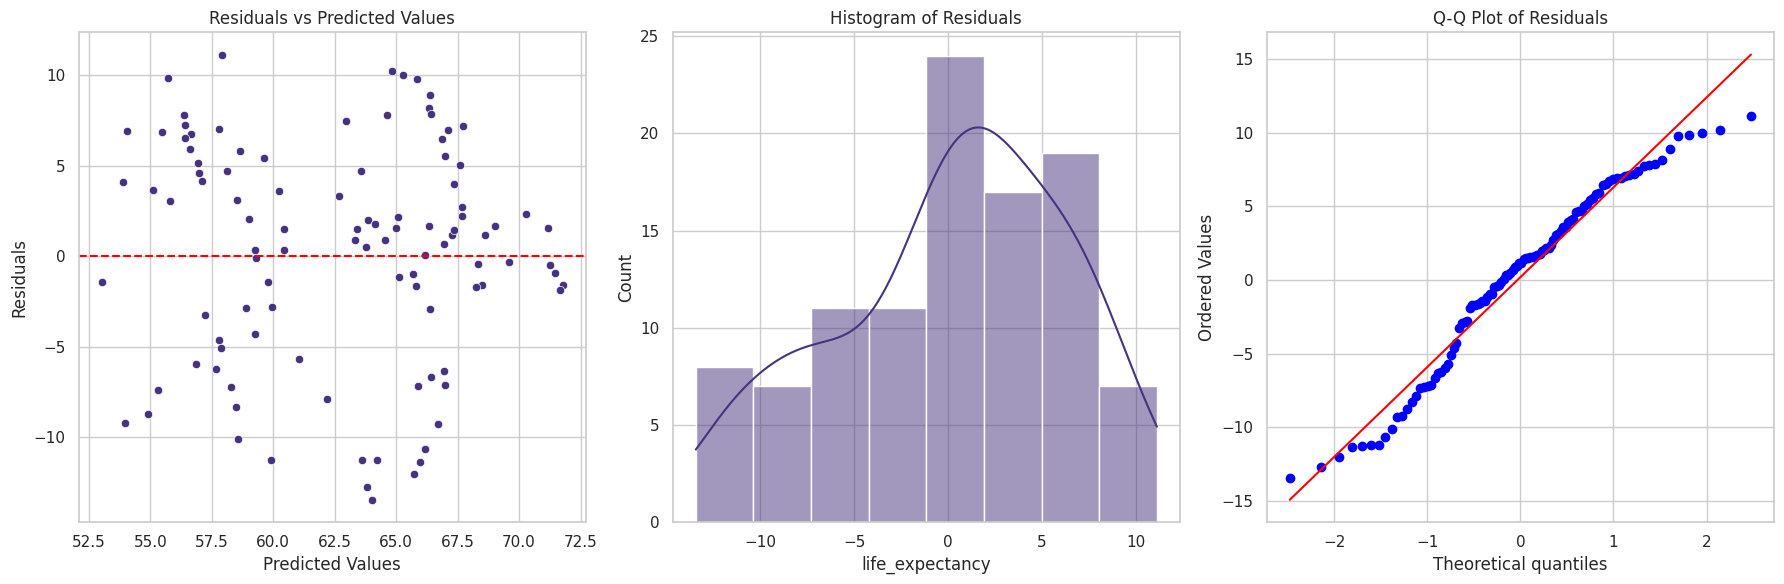

Breusch-Pagan Test Statistics: 28.552953946736462
Breusch-Pagan Test p-value: 0.00017451589279852972
                Variable       VIF
0                  const  1.000000
1      under_nourishment  1.628284
2     health_expenditure  1.307429
3  education_expenditure  1.195112
4           unemployment  1.335624
5           communicable  1.065253
6   income_group_encoded  1.731861
7             corruption  1.222042


In [ ]:
# model 3 Assumption

y_pred_3 = linear_model_3.predict(X_test_scaled_3)

residuals_3 = y_test_3 - y_pred_3

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=y_pred_3, y=residuals_3, ax=axes[0])
axes[0].axhline(0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted Values')

sns.histplot(residuals_3, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Residuals')

stats.probplot(residuals_3, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

X_train_with_const_3 = sm.add_constant(X_train_scaled_3)

linear_model_3_sm = sm.OLS(y_train_3, X_train_with_const_3).fit()

bp_test_3 = sms.het_breuschpagan(linear_model_3_sm.resid, linear_model_3_sm.model.exog)
bp_test_stat_3, bp_test_p_value_3, _, _ = bp_test_3

print(f"Breusch-Pagan Test Statistics: {bp_test_stat_3}")
print(f"Breusch-Pagan Test p-value: {bp_test_p_value_3}")

X_with_const_3 = sm.add_constant(X_train_scaled_3)

vif_data_3 = pd.DataFrame()
vif_data_3["Variable"] = ['const'] + list(X_3.columns)
vif_data_3["VIF"] = [variance_inflation_factor(X_with_const_3, i) for i in range(X_with_const_3.shape[1])]

print(vif_data_3)


In [ ]:
# Evaluate the model
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# 1. R²
r2_3 = r2_score(y_test_3, y_pred_3)
print(f"R²: {r2_3}")

# 3. Mean Squared Error(MSE)
X_train_with_const_3 = sm.add_constant(X_train_scaled_3)
linear_model_3_sm = sm.OLS(y_train_3, X_train_with_const_3).fit()
y_train_pred_3 = linear_model_3_sm.predict(X_train_with_const_3)
X_test_with_const_3 = sm.add_constant(X_test_scaled_3)
y_test_pred_3 = linear_model_3_sm.predict(X_test_with_const_3)

train_mse_3 = mean_squared_error(y_train_3, y_train_pred_3)
test_mse_3 = mean_squared_error(y_test_3, y_test_pred_3)

print(f"Training Mean Squared Error: {train_mse_3}")
print(f"Testing Mean Squared Error: {test_mse_3}")


R²: 0.3662317592308084
Training Mean Squared Error: 33.92199655404379
Testing Mean Squared Error: 37.05059253291657


In [ ]:
# model 8 = Model 3 - outliers

df_cleaned = df.dropna(subset=['under_nourishment', 'health_expenditure', 'education_expenditure',
                'unemployment', 'communicable', 'income', 'corruption']).copy()

numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in numeric_columns:
    df_cleaned = remove_outliers(df_cleaned, col)

income_group_mapping = {'Low income': 1, 'Lower middle income': 2, 'Upper middle income': 3, 'High income': 4}
df_cleaned['income_group_encoded'] = df_cleaned['income'].map(income_group_mapping)

X_8 = df_cleaned[['under_nourishment', 'health_expenditure', 'education_expenditure',
                'unemployment', 'communicable', 'income_group_encoded', 'corruption']]
y_8 = df_cleaned['life_expectancy']

X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X_8, y_8, test_size=0.2, random_state=42)

scaler_8 = StandardScaler()
X_train_scaled_8 = scaler_8.fit_transform(X_train_8)
X_test_scaled_8 = scaler_8.transform(X_test_8)

linear_model_8 = LinearRegression()
linear_model_8.fit(X_train_scaled_8, y_train_8)

coefficients_8 = pd.DataFrame(linear_model_8.coef_, X_8.columns, columns=["Coefficient"])
print(coefficients_8)

y_pred_8 = linear_model_8.predict(X_test_scaled_8)

mse_8 = mean_squared_error(y_test_8, y_pred_8)
print(f"Mean Squared Error (Linear Regression) - Model 8: {mse_8}")

joblib.dump(linear_model_8, 'linear_model_8_no_outliers.pkl')
joblib.dump(scaler_8, 'scaler_8_no_outliers.pkl')

                       Coefficient
under_nourishment        -1.696839
health_expenditure        0.159046
education_expenditure     1.003542
unemployment             -1.173628
communicable             -2.215451
income_group_encoded      3.535869
corruption                0.332110
Mean Squared Error (Linear Regression) - Model 8: 17.988710859070263


['scaler_8_no_outliers.pkl']

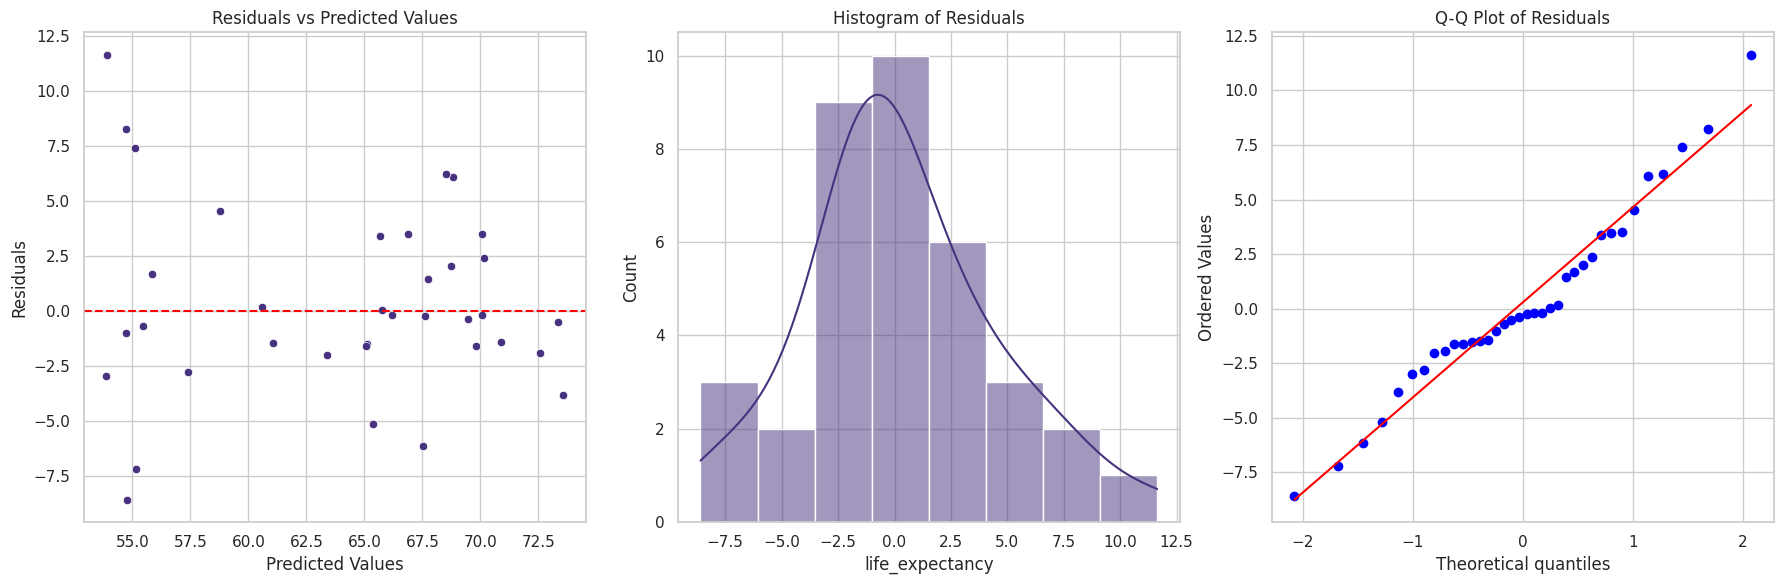

Breusch-Pagan Test Statistics: 68.20055648311957
Breusch-Pagan Test p-value: 3.4103906556426985e-12
                Variable       VIF
0                  const  1.000000
1      under_nourishment  2.447565
2     health_expenditure  1.343532
3  education_expenditure  1.780322
4           unemployment  1.706428
5           communicable  1.663532
6   income_group_encoded  2.486681
7             corruption  2.198583


In [ ]:
# model 8 Assumption

y_pred_8 = linear_model_8.predict(X_test_scaled_8)

residuals_8 = y_test_8 - y_pred_8

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=y_pred_8, y=residuals_8, ax=axes[0])
axes[0].axhline(0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted Values')


sns.histplot(residuals_8, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Residuals')

stats.probplot(residuals_8, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

X_train_with_const_8 = sm.add_constant(X_train_scaled_8)

linear_model_8_sm = sm.OLS(y_train_8, X_train_with_const_8).fit()

bp_test_8 = sms.het_breuschpagan(linear_model_8_sm.resid, linear_model_8_sm.model.exog)
bp_test_stat_8, bp_test_p_value_8, _, _ = bp_test_8

print(f"Breusch-Pagan Test Statistics: {bp_test_stat_8}")
print(f"Breusch-Pagan Test p-value: {bp_test_p_value_8}")

X_with_const_8 = sm.add_constant(X_train_scaled_8)

vif_data_8 = pd.DataFrame()
vif_data_8["Variable"] = ['const'] + list(X_8.columns)
vif_data_8["VIF"] = [variance_inflation_factor(X_with_const_8, i) for i in range(X_with_const_8.shape[1])]

print(vif_data_8)

In [ ]:
# Model 8 Evaluation

r2_8 = r2_score(y_test_8, y_pred_8)
print(f"R²: {r2_8}")

X_train_with_const_8 = sm.add_constant(X_train_scaled_8)

linear_model_8_sm = sm.OLS(y_train_8, X_train_with_const_8).fit()

y_train_pred_8 = linear_model_8_sm.predict(X_train_with_const_8)

X_test_with_const_8 = sm.add_constant(X_test_scaled_8)
y_test_pred_8 = linear_model_8_sm.predict(X_test_with_const_8)

train_mse_8 = mean_squared_error(y_train_8, y_train_pred_8)
test_mse_8 = mean_squared_error(y_test_8, y_test_pred_8)

print(f"Training Mean Squared Error: {train_mse_8}")
print(f"Testing Mean Squared Error: {test_mse_8}")

R²: 0.667861071813951
Training Mean Squared Error: 19.909012910873347
Testing Mean Squared Error: 17.988710859070256


In [ ]:
# model 9  Remove outliers from model 4 '(remove income group and corruption due to too many Nan)

df_cleaned = df.dropna(subset=['under_nourishment', 'health_expenditure', 'education_expenditure',
                               'unemployment', 'co2']).copy()

# Remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

variables = ['under_nourishment', 'health_expenditure', 'education_expenditure', 'unemployment', 'co2']
for var in variables:
    df_cleaned = remove_outliers(df_cleaned, var)

X_9 = df_cleaned[['under_nourishment', 'health_expenditure', 'education_expenditure',
                  'unemployment', 'co2']]
y_9 = df_cleaned['life_expectancy']

X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_9, y_9, test_size=0.2, random_state=42)

scaler_9 = StandardScaler()
X_train_scaled_9 = scaler_9.fit_transform(X_train_9)
X_test_scaled_9 = scaler_9.transform(X_test_9)

linear_model_9 = LinearRegression()
linear_model_9.fit(X_train_scaled_9, y_train_9)

coefficients_9 = pd.DataFrame(linear_model_9.coef_, X_9.columns, columns=["Coefficient"])
print(coefficients_9)

y_pred_9 = linear_model_9.predict(X_test_scaled_9)

mse_9 = mean_squared_error(y_test_9, y_pred_9)
print(f"Mean Squared Error (Linear Regression) - Model 9: {mse_9}")

joblib.dump(linear_model_9, 'linear_model_9.pkl')
joblib.dump(scaler_9, 'scaler_9.pkl')

co2_coefficient_9 = coefficients_9.loc['co2', 'Coefficient']
print(f"When the value of CO₂ increases by 1 unit, life expectancy increases by {co2_coefficient_9} units.")

                       Coefficient
under_nourishment        -3.921233
health_expenditure        2.725108
education_expenditure     0.726576
unemployment             -0.066631
co2                       0.858437
Mean Squared Error (Linear Regression) - Model 9: 17.075865712310044
When the value of CO₂ increases by 1 unit, life expectancy increases by 0.8584369671953331 units.


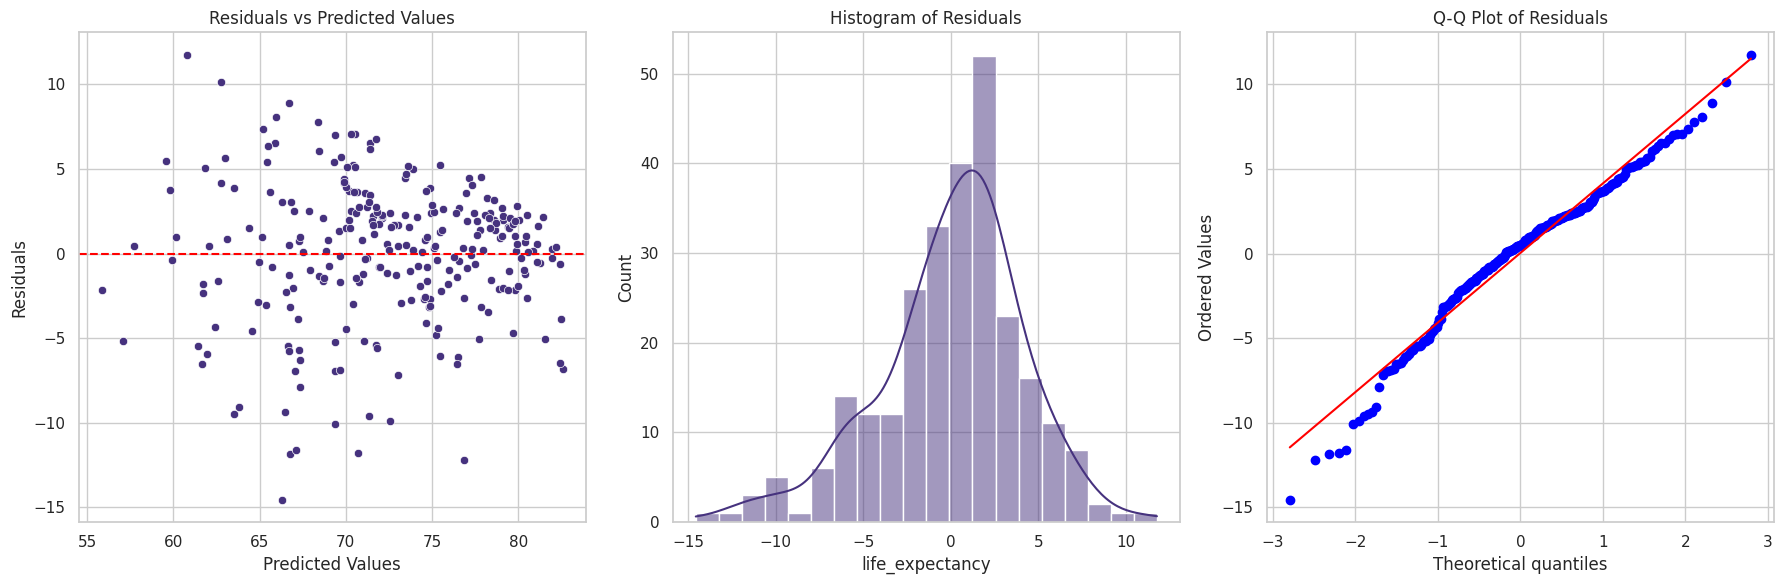

Breusch-Pagan Test Statistics: 166.9754536951872
Breusch-Pagan Test p-value: 3.2234273653414866e-34
                Variable       VIF
0                  const  1.000000
1      under_nourishment  1.362247
2     health_expenditure  1.309511
3  education_expenditure  1.275378
4           unemployment  1.180368
5                    co2  1.116406


In [ ]:
# model 9 Assumption

residuals_9 = y_test_9 - y_pred_9
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=y_pred_9, y=residuals_9, ax=axes[0])
axes[0].axhline(0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted Values')

sns.histplot(residuals_9, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Residuals')

stats.probplot(residuals_9, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

X_train_with_const_9 = sm.add_constant(X_train_scaled_9)
linear_model_9_sm = sm.OLS(y_train_9, X_train_with_const_9).fit()
bp_test_9 = sms.het_breuschpagan(linear_model_9_sm.resid, linear_model_9_sm.model.exog)
bp_test_stat_9, bp_test_p_value_9, _, _ = bp_test_9
print(f"Breusch-Pagan Test Statistics: {bp_test_stat_9}")
print(f"Breusch-Pagan Test p-value: {bp_test_p_value_9}")

X_with_const_9 = sm.add_constant(X_train_scaled_9)
vif_data_9 = pd.DataFrame()
vif_data_9["Variable"] = ['const'] + list(X_9.columns)
vif_data_9["VIF"] = [variance_inflation_factor(X_with_const_9, i) for i in range(X_with_const_9.shape[1])]
print(vif_data_9)

In [ ]:
# model 9 evaluation

r2_9 = r2_score(y_test_9, y_pred_9)
print(f"R²: {r2_9}")

X_train_with_const_9 = sm.add_constant(X_train_scaled_9)
linear_model_9_sm = sm.OLS(y_train_9, X_train_with_const_9).fit()

y_train_pred_9 = linear_model_9_sm.predict(X_train_with_const_9)

X_test_with_const_9 = sm.add_constant(X_test_scaled_9)
y_test_pred_9 = linear_model_9_sm.predict(X_test_with_const_9)

train_mse_9 = mean_squared_error(y_train_9, y_train_pred_9)
test_mse_9 = mean_squared_error(y_test_9, y_test_pred_9)

print(f"Training Mean Squared Error: {train_mse_9}")
print(f"Testing Mean Squared Error: {test_mse_9}")

R²: 0.6627855565959417
Training Mean Squared Error: 25.34003947768934
Testing Mean Squared Error: 17.07586571231005


In [ ]:
# Filter data where CO2 <= 35000

df_cleaned = df.dropna(subset=['under_nourishment', 'health_expenditure', 'education_expenditure',
                               'unemployment', 'co2']).copy()

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

variables = ['under_nourishment', 'health_expenditure', 'education_expenditure', 'unemployment', 'co2']
for var in variables:
    df_cleaned = remove_outliers(df_cleaned, var)

df_filtered_10 = df_cleaned[df_cleaned['co2'] <= 35000].copy()

X_10 = df_filtered_10[['under_nourishment', 'health_expenditure', 'education_expenditure',
                        'unemployment', 'co2']]
y_10 = df_filtered_10['life_expectancy']

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.2, random_state=42)

scaler_10 = StandardScaler()
X_train_scaled_10 = scaler_10.fit_transform(X_train_10)
X_test_scaled_10 = scaler_10.transform(X_test_10)

linear_model_10 = LinearRegression()
linear_model_10.fit(X_train_scaled_10, y_train_10)

coefficients_10 = pd.DataFrame(linear_model_10.coef_, X_10.columns, columns=["Coefficient"])
print(coefficients_10)

y_pred_10 = linear_model_10.predict(X_test_scaled_10)

mse_10 = mean_squared_error(y_test_10, y_pred_10)
print(f"Mean Squared Error (Linear Regression) - Model 10: {mse_10}")

joblib.dump(linear_model_10, 'linear_model_10.pkl')
joblib.dump(scaler_10, 'scaler_10.pkl')

co2_coefficient_10 = coefficients_10.loc['co2', 'Coefficient']
print(f"When the value of CO₂ increases by 1 unit, life expectancy increases by {co2_coefficient_10} units.")

                       Coefficient
under_nourishment        -4.066056
health_expenditure        3.020218
education_expenditure     1.073102
unemployment              0.139971
co2                       1.540555
Mean Squared Error (Linear Regression) - Model 10: 31.316108296626147
When the value of CO₂ increases by 1 unit, life expectancy increases by 1.5405548773218773 units.


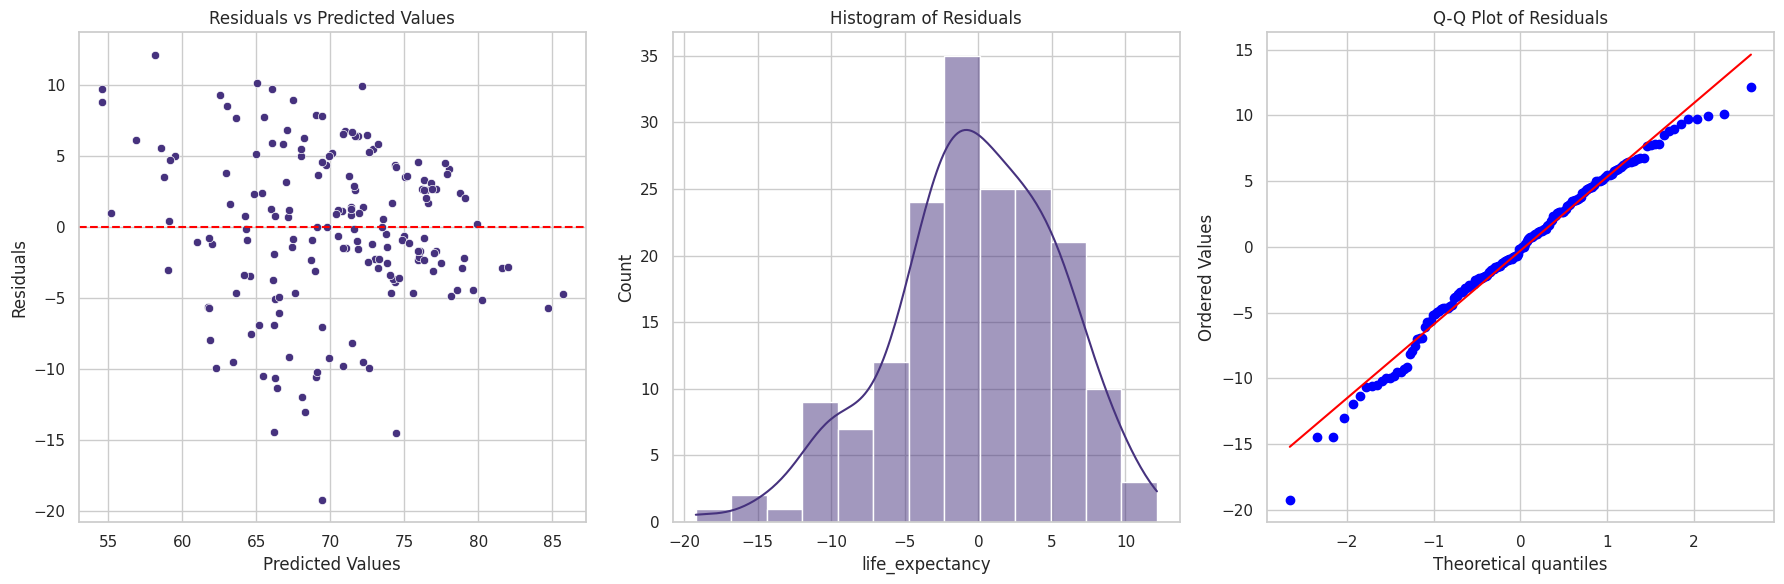

Breusch-Pagan Test Statistics: 77.58389802088001
Breusch-Pagan Test p-value: 2.685525222973476e-15
VIF for each variable:
                Variable       VIF
0                  const  1.000000
1      under_nourishment  1.223415
2     health_expenditure  1.175900
3  education_expenditure  1.193762
4           unemployment  1.152641
5                    co2  1.053775


In [ ]:
# model 10 assumption

residuals_10 = y_test_10 - y_pred_10
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=y_pred_10, y=residuals_10, ax=axes[0])
axes[0].axhline(0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted Values')

sns.histplot(residuals_10, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Residuals')

stats.probplot(residuals_10, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

X_train_with_const_10 = sm.add_constant(X_train_scaled_10)
linear_model_10_sm = sm.OLS(y_train_10, X_train_with_const_10).fit()
bp_test_10 = sms.het_breuschpagan(linear_model_10_sm.resid, linear_model_10_sm.model.exog)
bp_test_stat_10, bp_test_p_value_10, _, _ = bp_test_10
print(f"Breusch-Pagan Test Statistics: {bp_test_stat_10}")
print(f"Breusch-Pagan Test p-value: {bp_test_p_value_10}")

X_with_const_10 = sm.add_constant(X_train_scaled_10)
vif_data_10 = pd.DataFrame()
vif_data_10["Variable"] = ['const'] + list(X_10.columns)  # X_train_10.columnsに修正
vif_data_10["VIF"] = [variance_inflation_factor(X_with_const_10, i) for i in range(X_with_const_10.shape[1])]

print("VIF for each variable:")
print(vif_data_10)

In [ ]:
# model 10 evaluation

r2_10 = r2_score(y_test_10, y_pred_10)
print(f"R²: {r2_10}")

X_train_with_const_10 = sm.add_constant(X_train_scaled_10)
linear_model_10_sm = sm.OLS(y_train_10, X_train_with_const_10).fit()

y_train_pred_10 = linear_model_10_sm.predict(X_train_with_const_10)

X_test_with_const_10 = sm.add_constant(X_test_scaled_10)
y_test_pred_10 = linear_model_10_sm.predict(X_test_with_const_10)

train_mse_10 = mean_squared_error(y_train_10, y_train_pred_10)
test_mse_10 = mean_squared_error(y_test_10, y_test_pred_10)

print(f"Training Mean Squared Error: {train_mse_10}")
print(f"Testing Mean Squared Error: {test_mse_10}")

R²: 0.4695712363070941
Training Mean Squared Error: 27.008379818845512
Testing Mean Squared Error: 31.316108296626126


In [ ]:
# model 11 co2 > 35000

df_cleaned = df.dropna(subset=['under_nourishment', 'health_expenditure', 'education_expenditure',
                               'unemployment', 'co2']).copy()

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

variables = ['under_nourishment', 'health_expenditure', 'education_expenditure', 'unemployment', 'co2']
for var in variables:
    df_cleaned = remove_outliers(df_cleaned, var)

df_filtered_11 = df_cleaned[df_cleaned['co2'] > 35000].copy()


X_11 = df_filtered_11[['under_nourishment', 'health_expenditure', 'education_expenditure',
                        'unemployment', 'co2']]
y_11 = df_filtered_11['life_expectancy']

X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X_11, y_11, test_size=0.2, random_state=42)

scaler_11 = StandardScaler()
X_train_scaled_11 = scaler_11.fit_transform(X_train_11)
X_test_scaled_11 = scaler_11.transform(X_test_11)

linear_model_11 = LinearRegression()
linear_model_11.fit(X_train_scaled_11, y_train_11)

coefficients_11 = pd.DataFrame(linear_model_11.coef_, X_11.columns, columns=["Coefficient"])
print(coefficients_11)

y_pred_11 = linear_model_11.predict(X_test_scaled_11)

mse_11 = mean_squared_error(y_test_11, y_pred_11)
print(f"Mean Squared Error (Linear Regression) - Model 11: {mse_11}")

joblib.dump(linear_model_11, 'linear_model_11.pkl')
joblib.dump(scaler_11, 'scaler_11.pkl')

co2_coefficient_11 = coefficients_11.loc['co2', 'Coefficient']
print(f"When the value of CO₂ increases by 1 unit, life expectancy increases by {co2_coefficient_11} units.")


                       Coefficient
under_nourishment        -0.740514
health_expenditure        2.722035
education_expenditure     0.475720
unemployment             -0.660099
co2                      -0.687016
Mean Squared Error (Linear Regression) - Model 11: 5.6731780780103005
When the value of CO₂ increases by 1 unit, life expectancy increases by -0.6870157781174426 units.


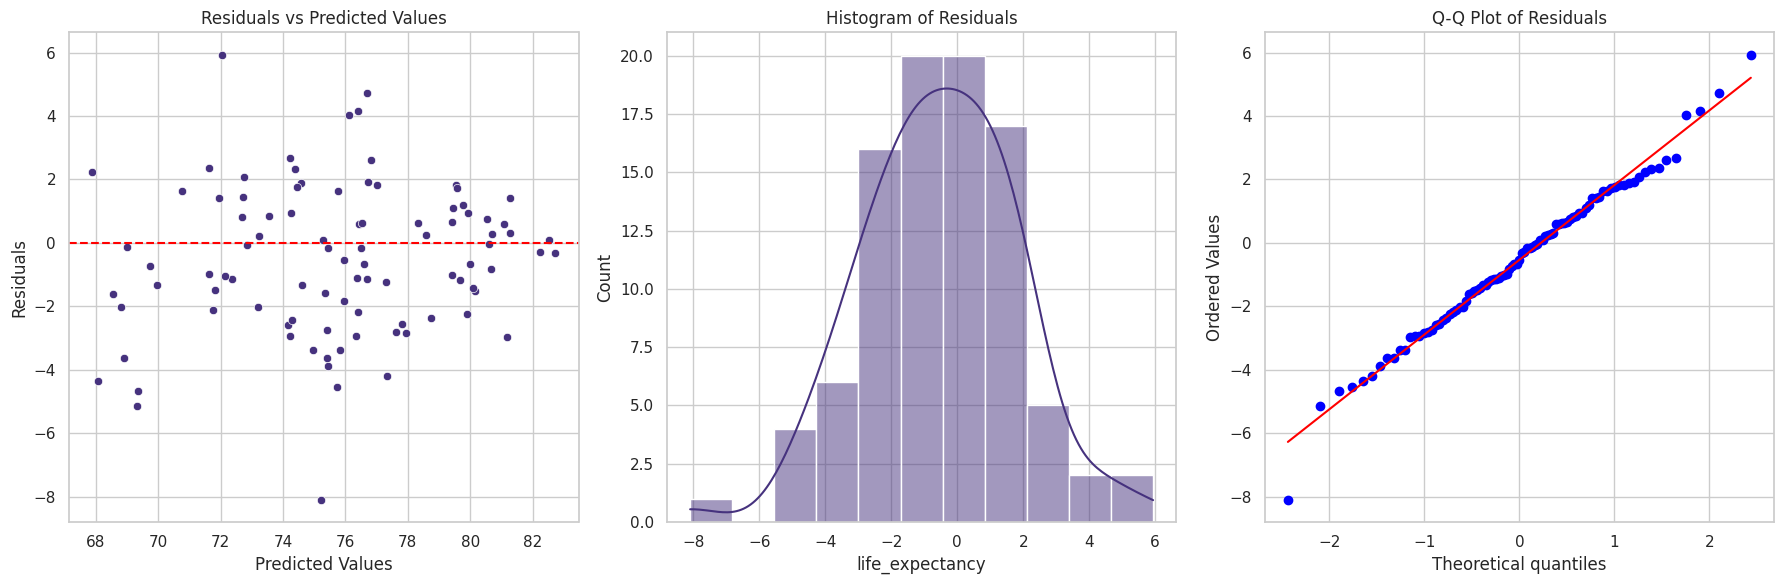

Breusch-Pagan Test Statistics: 35.908156040042215
Breusch-Pagan Test p-value: 9.908468679869134e-07
VIF for each variable (excluding income and corruption):
                Variable       VIF
0                  const  1.000000
1      under_nourishment  1.638904
2     health_expenditure  2.059931
3  education_expenditure  1.788470
4           unemployment  1.180505
5                    co2  1.090390


In [ ]:
# model 11 assumption
X_11_without_income_corruption = df_filtered_11[['under_nourishment', 'health_expenditure', 'education_expenditure',
                                                  'unemployment', 'co2']]

residuals_11 = y_test_11 - y_pred_11
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=y_pred_11, y=residuals_11, ax=axes[0])
axes[0].axhline(0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted Values')

sns.histplot(residuals_11, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Residuals')

stats.probplot(residuals_11, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

X_train_with_const_11 = sm.add_constant(X_train_scaled_11)
linear_model_11_sm = sm.OLS(y_train_11, X_train_with_const_11).fit()
bp_test_11 = sms.het_breuschpagan(linear_model_11_sm.resid, linear_model_11_sm.model.exog)
bp_test_stat_11, bp_test_p_value_11, _, _ = bp_test_11
print(f"Breusch-Pagan Test Statistics: {bp_test_stat_11}")
print(f"Breusch-Pagan Test p-value: {bp_test_p_value_11}")

X_with_const_11 = sm.add_constant(X_train_scaled_11)
vif_data_11 = pd.DataFrame()
vif_data_11["Variable"] = ['const'] + list(X_11_without_income_corruption.columns)  # income_group_encoded と corruption を除いた変数
vif_data_11["VIF"] = [variance_inflation_factor(X_with_const_11, i) for i in range(X_with_const_11.shape[1])]

print("VIF for each variable (excluding income and corruption):")
print(vif_data_11)


In [ ]:
# model 11 evaluation
r2_11 = r2_score(y_test_11, y_pred_11)
print(f"R²: {r2_11}")

X_train_with_const_11 = sm.add_constant(X_train_scaled_11)
linear_model_11_sm = sm.OLS(y_train_11, X_train_with_const_11).fit()

y_train_pred_11 = linear_model_11_sm.predict(X_train_with_const_11)

X_test_with_const_11 = sm.add_constant(X_test_scaled_11)
y_test_pred_11 = linear_model_11_sm.predict(X_test_with_const_11)

train_mse_11 = mean_squared_error(y_train_11, y_train_pred_11)
test_mse_11 = mean_squared_error(y_test_11, y_test_pred_11)

print(f"Training Mean Squared Error: {train_mse_11}")
print(f"Testing Mean Squared Error: {test_mse_11}")


R²: 0.7311660902125763
Training Mean Squared Error: 5.9344628059052695
Testing Mean Squared Error: 5.673178078010252
